![](img/ministere.jpg)

# RAMP on detecting Accidents Severity

_Chaima El Hif, Mohamed Ben Jebara, Nour Elkamel, Taher Asmi, Chaima Messai & Salma Ezzina_

## Introduction

For each injury accident (i.e. an accident on a public roadway involving at least one vehicle and at least one victim requiring medical attention), information describing the accident is entered by the law enforcement unit (police, gendarmerie, etc.) that responded to the accident. These entries are compiled in a form called an accident analysis form. All of these forms make up the national file of traffic accidents involving injuries, known as the "BAAC1 file", administered by the National Interministerial Road Safety Observatory (ONISR). The databases, extracted from the BAAC file, list all traffic accidents involving injuries that occurred during a given year in metropolitan France as well as the overseas departments (Guadeloupe, Guyana, Martinique, Reunion, and Mayotte since 2012) with a simplified description. This includes information on the location of the accident, as reported, as well as information on the characteristics of the accident and its location, the vehicles involved and their victims.

The files Characteristics - Places - Vehicles - Users were retrieved in csv format from the website www.data.gouv.fr. These files regroup the data related to the accidents registered during the year 2021.

The database of traffic accidents with injuries of a given year is divided into 4 sections in the form of a file in csv format for each of them:
1. The section **CHARACTERISTICS** which describes the general circumstances of the accident
2. The **LOCATION** section which describes the main location of the accident even if it took place at an
intersection
3. The **VEHICLES** involved section
4. The **USERS** involved item
Each of the variables contained in a section must be able to be linked to the variables of the other sections. The accident identifier number (Cf. "Num_Acc") present in these 4 fields allows to establish a link between all the variables which describe an accident. When an accident involves several vehicles, it is also necessary to be able to link each vehicle to its occupants. This link is made by the variable "Num_veh".
Most of the variables contained in the four files listed above can contain empty cells or a zero or a point. In these three cases, it is a cell that has not been filled in by the police or without any object.

## Getting started with the RAMP starting kit

### Software prerequisites

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting the data

The public train and test data can be downloaded by running from the root of the starting kit:

    python download_data.py

In [2]:
from problem import get_train_data

data_train, labels_train = get_train_data()

# The Data

In [3]:
data_train.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,catu,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
34280,202100014931,18,6,2021,21:15,2,13,13103,1,1,...,1.0,1.0,1985.0,5.0,1.0,0.0,-1.0,-1.0,-1,-1.0
97787,202100042532,26,4,2021,18:58,1,29,29217,1,2,...,1.0,2.0,2001.0,5.0,8.0,-1.0,-1.0,0.0,0,-1.0
120191,202100052575,3,2,2021,14:36,1,75,75107,2,3,...,1.0,1.0,2004.0,5.0,2.0,6.0,-1.0,0.0,0,-1.0
17282,202100007488,19,11,2021,11:03,1,89,89464,2,1,...,1.0,1.0,1934.0,3.0,1.0,-1.0,-1.0,0.0,0,-1.0
28844,202100012516,15,10,2021,08:29,2,41,41223,1,1,...,1.0,2.0,1982.0,4.0,1.0,5.0,-1.0,0.0,0,-1.0


In [4]:
labels_train

array([4, 4, 4, ..., 4, 4, 4])

In [5]:
print(f"In this dataset we have {data_train.shape[0]} registred accidents and {data_train.shape[1]} features recovered from the different tables.")

In this dataset we have 86492 registred accidents and 53 features recovered from the different tables.


## Description of the features

The challenge with this dataset is that we have numerical and categorical features. Thus, we need to work on the preprocessing of the data:
1. Handle the missing values
2. Transform categorical variables: Encoding

In this challenge we are dealing with a multiclassification problem.

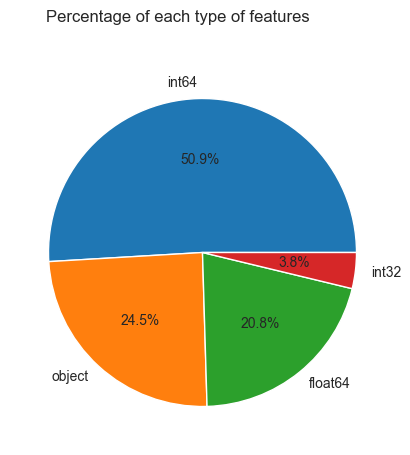

In [6]:
# Checking types
plt.figure(figsize=(20,5))
data_train.dtypes.value_counts().plot.pie(autopct='%1.1f%%')
plt.suptitle("Percentage of each type of features")
plt.show()

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86492 entries, 34280 to 121958
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Num_Acc      86492 non-null  int64  
 1   jour         86492 non-null  int64  
 2   mois         86492 non-null  int64  
 3   an           86492 non-null  int64  
 4   hrmn         86492 non-null  object 
 5   lum          86492 non-null  int64  
 6   dep          86492 non-null  object 
 7   com          86492 non-null  object 
 8   agg          86492 non-null  int64  
 9   int          86492 non-null  int64  
 10  atm          86492 non-null  int64  
 11  col          86492 non-null  int64  
 12  adr          85570 non-null  object 
 13  lat          86492 non-null  object 
 14  long         86492 non-null  object 
 15  catr         86492 non-null  int64  
 16  voie         80334 non-null  object 
 17  v1           86492 non-null  int64  
 18  v2           7537 non-null   object 
 19 

In [8]:
print("The following are the integer features:")
print(data_train.select_dtypes("int").columns.values)
print("The following are the real features:")
print(data_train.select_dtypes("float").columns.values)
print("The following are the categorical features:")
print(data_train.select_dtypes(include="object").columns.values)

The following are the integer features:
['Num_Acc' 'jour' 'mois' 'an' 'lum' 'agg' 'int' 'atm' 'col' 'catr' 'v1'
 'circ' 'nbv' 'vosp' 'prof' 'pr' 'pr1' 'plan' 'surf' 'infra' 'situ' 'vma'
 'senc' 'catv' 'obs' 'obsm' 'choc' 'manv' 'motor']
The following are the real features:
['occutc' 'place' 'catu' 'sexe' 'an_nais' 'trajet' 'secu1' 'secu2' 'secu3'
 'locp' 'etatp']
The following are the categorical features:
['hrmn' 'dep' 'com' 'adr' 'lat' 'long' 'voie' 'v2' 'lartpc' 'larrout'
 'id_vehicule' 'num_veh_veh' 'actp']


In this dataset we have features related to:
1. Characteristics of the accident: Num_Acc, jour, mois, an, hrmn, lum(lighting conditions in which the accident occurred: daylight, Dusk or dawn..), dep, com, lat, long, agg(agglomération or not), int(intersection), atm(atmosphere conditions), col(type of collision), adr(adress)
2. Location: Num_Acc, catr(road category), voie(num of roadway), V1, V2, circ(traffic regime), nbv(number of roadway),
3. Users: Num_Acc, Num_Veh, place, catu (user category: Driver, Passenger, Pedestrain..), sexe, an_nais(birthday year), trajet, secu, locp(Pedestrian Location), actp(Action Location), etap
4. Vehicles: Num_Acc, Num_Veh, senc(Direction of traffic), catv(vehicle category: scooter, bike...), obs(Fixed obstacle hit), obsm (Moving obstacle hit), choc(Initial shock point), manv(Main maneuver before the accident), occutc(Number of occupants on public transit).

For more detail about the features you can look at the document **"description-de-la-liste-des-vehicules-immatricules-impliques-dans-les-accidents-corporels.pdf"**


In [9]:
# Checking the integer variables for possible feature engineering
for col in data_train.select_dtypes(exclude="object"):
  print(f'{col :-<50} {data_train[col].nunique()}')

Num_Acc------------------------------------------- 49517
jour---------------------------------------------- 31
mois---------------------------------------------- 12
an------------------------------------------------ 1
lum----------------------------------------------- 5
agg----------------------------------------------- 2
int----------------------------------------------- 9
atm----------------------------------------------- 10
col----------------------------------------------- 8
catr---------------------------------------------- 8
v1------------------------------------------------ 4
circ---------------------------------------------- 5
nbv----------------------------------------------- 14
vosp---------------------------------------------- 5
prof---------------------------------------------- 5
pr------------------------------------------------ 439
pr1----------------------------------------------- 1111
plan---------------------------------------------- 5
surf-----------------------------

* "an" column has a single value since it's only the data of 2021. Can be removed because variance is null.
* Some variables can be considered categorical features (agg, sexe...).

In [10]:
# Checking the integer variables for possible feature engineering
for col in data_train.select_dtypes("object"):
  print(f'{col :-<50} {data_train[col].nunique()}')

hrmn---------------------------------------------- 1354
dep----------------------------------------------- 107
com----------------------------------------------- 10080
adr----------------------------------------------- 26574
lat----------------------------------------------- 47999
long---------------------------------------------- 48264
voie---------------------------------------------- 15919
v2------------------------------------------------ 26
lartpc-------------------------------------------- 17
larrout------------------------------------------- 81
id_vehicule--------------------------------------- 70797
num_veh_veh--------------------------------------- 48
actp---------------------------------------------- 13


* This can give us an idea about the type of encoding we want to apply to each category column.

In [11]:
# Checking Missing Data
percentage_na = (data_train.isnull().sum()/data_train.shape[0]).sort_values(ascending=False)
print('The percentage of missing values:')
for column_name in percentage_na.index:
  print(f'{column_name} : {np.round(percentage_na.loc[column_name]*100,2)} %')

The percentage of missing values:
lartpc : 99.8 %
occutc : 98.96 %
v2 : 91.29 %
voie : 7.12 %
an_nais : 2.34 %
adr : 1.07 %
situ : 0.0 %
vma : 0.0 %
id_vehicule : 0.0 %
num_veh_veh : 0.0 %
senc : 0.0 %
catv : 0.0 %
obs : 0.0 %
obsm : 0.0 %
choc : 0.0 %
motor : 0.0 %
manv : 0.0 %
surf : 0.0 %
place : 0.0 %
catu : 0.0 %
sexe : 0.0 %
trajet : 0.0 %
secu1 : 0.0 %
secu2 : 0.0 %
secu3 : 0.0 %
locp : 0.0 %
actp : 0.0 %
infra : 0.0 %
Num_Acc : 0.0 %
larrout : 0.0 %
jour : 0.0 %
mois : 0.0 %
an : 0.0 %
hrmn : 0.0 %
lum : 0.0 %
dep : 0.0 %
com : 0.0 %
agg : 0.0 %
int : 0.0 %
atm : 0.0 %
col : 0.0 %
lat : 0.0 %
long : 0.0 %
catr : 0.0 %
v1 : 0.0 %
circ : 0.0 %
nbv : 0.0 %
vosp : 0.0 %
prof : 0.0 %
pr : 0.0 %
pr1 : 0.0 %
plan : 0.0 %
etatp : 0.0 %


* We see here that we have variables that have missing values. We can divide them into 2 subgroups. The first group contains on average 95% of missing values, while the second subgroup contains on average 5% of missing values.
* For the first subgroup, we obtain 95% of missing values, so it will be good to abandon it since it will not give us any information.

## Description of the target

**grav**: The target represents the severity of injury to the user. The accident victims are classified in three categories of victims plus the unharmed as following:
1. Unharmed
2. Killed
3. Injured in hospital
4. Slightly injured

In [12]:
# Checking the target
val = pd.Series(labels_train).value_counts(normalize=True)*100
print(f"The distribution of the target is as following: \n {val.round(2)}")

The distribution of the target is as following: 
 1    42.82
4    39.87
3    14.83
2     2.48
dtype: float64


We can also visualize the target with bar plot

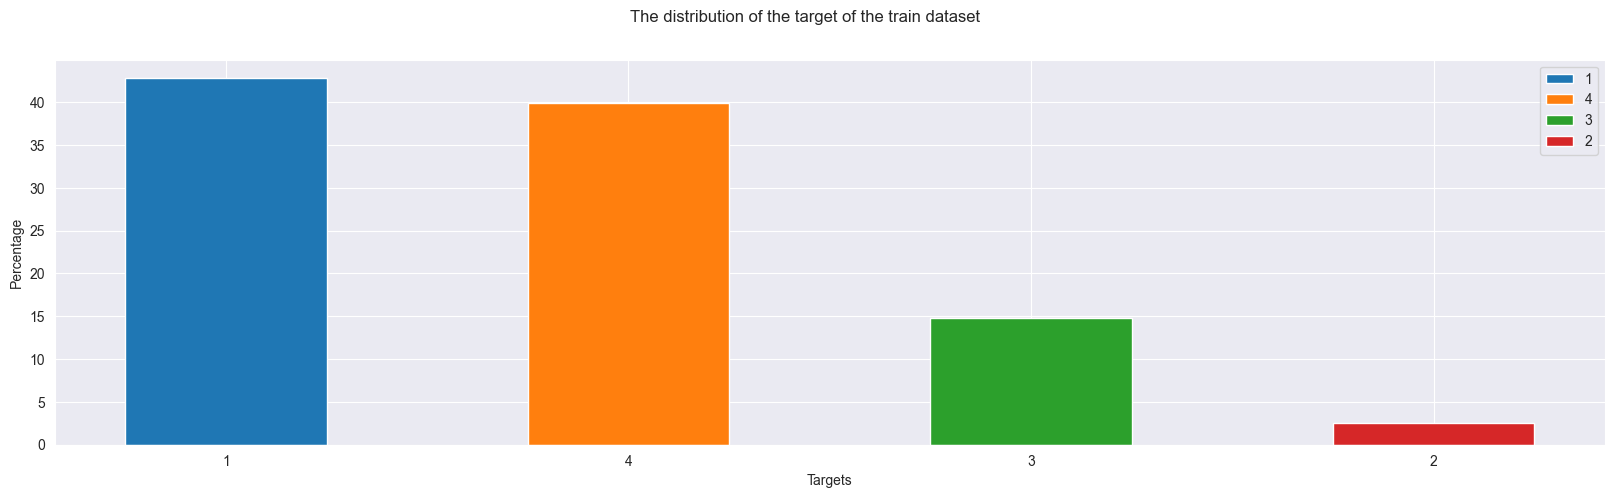

In [16]:
# Visualising the target distribution
plt.figure(figsize=(20,5))

for i in range(val.shape[0]):
  plt.bar(str(val.index[i]), val.values[i], width=0.5, label=str(val.index[i]))

plt.ylabel("Percentage")
plt.xlabel("Targets")
plt.legend()
plt.suptitle("The distribution of the target of the train dataset")
plt.show()

## Relation: Target & Numerical features
In this part we will visualize our numerical features distribution and relationship with the target.

C:\Users\chaim\AppData\Local\Temp\ipykernel_56064\2965915912.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (20, 5))


<Figure size 2000x500 with 0 Axes>

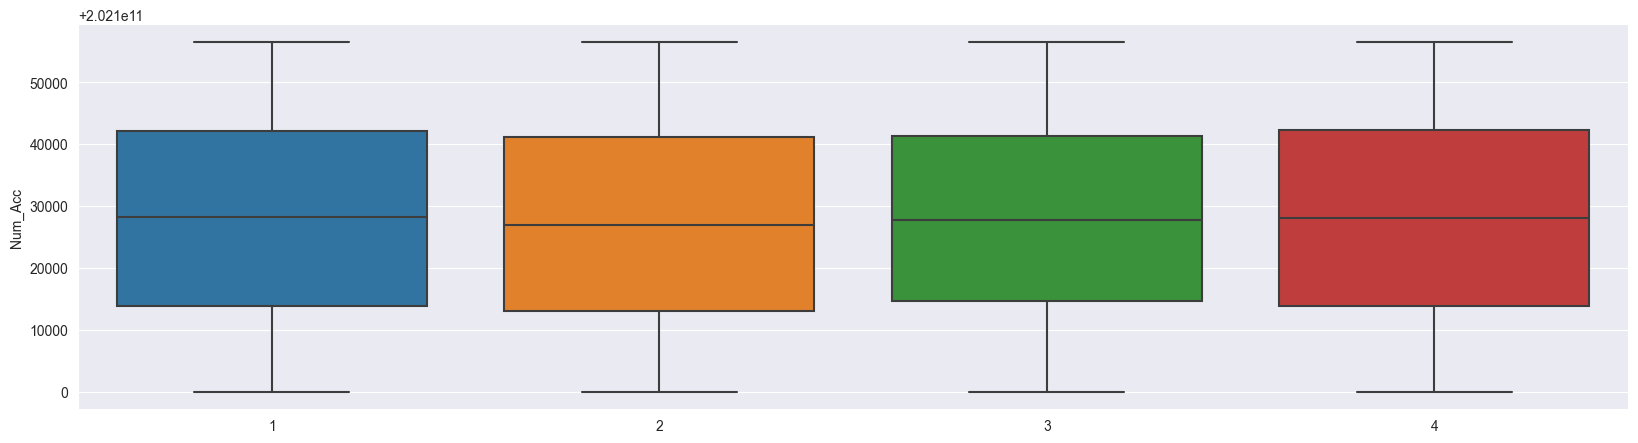

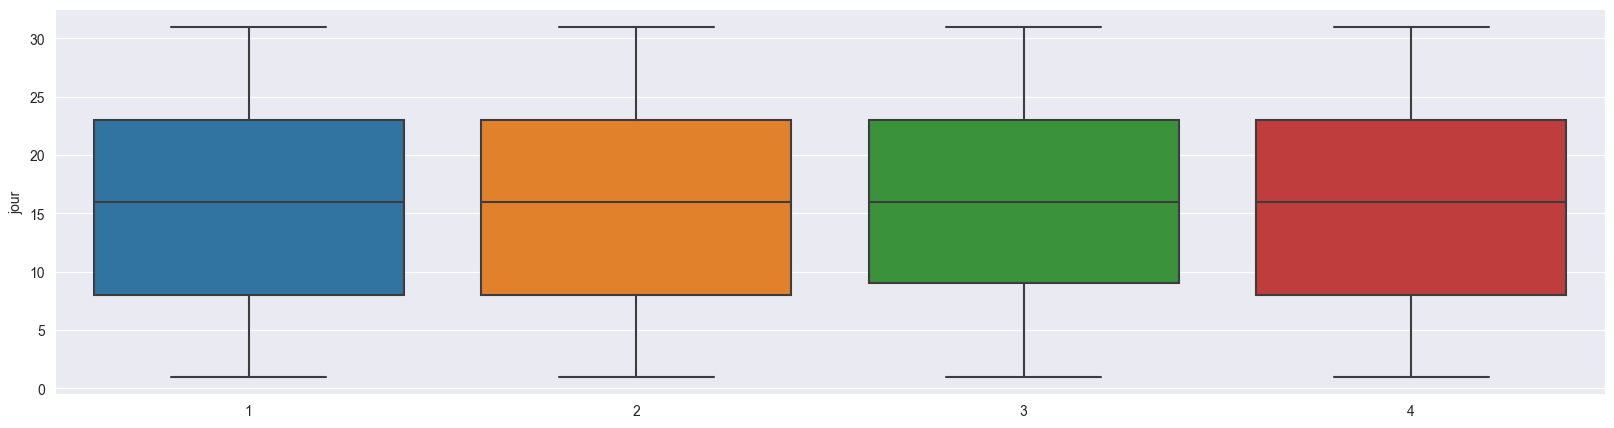

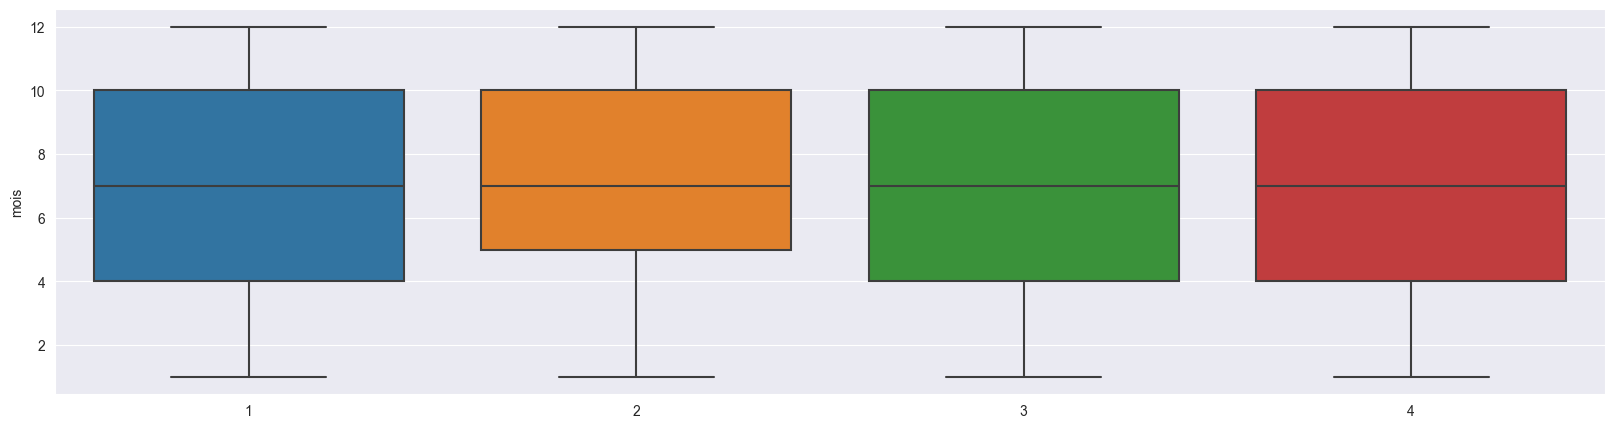

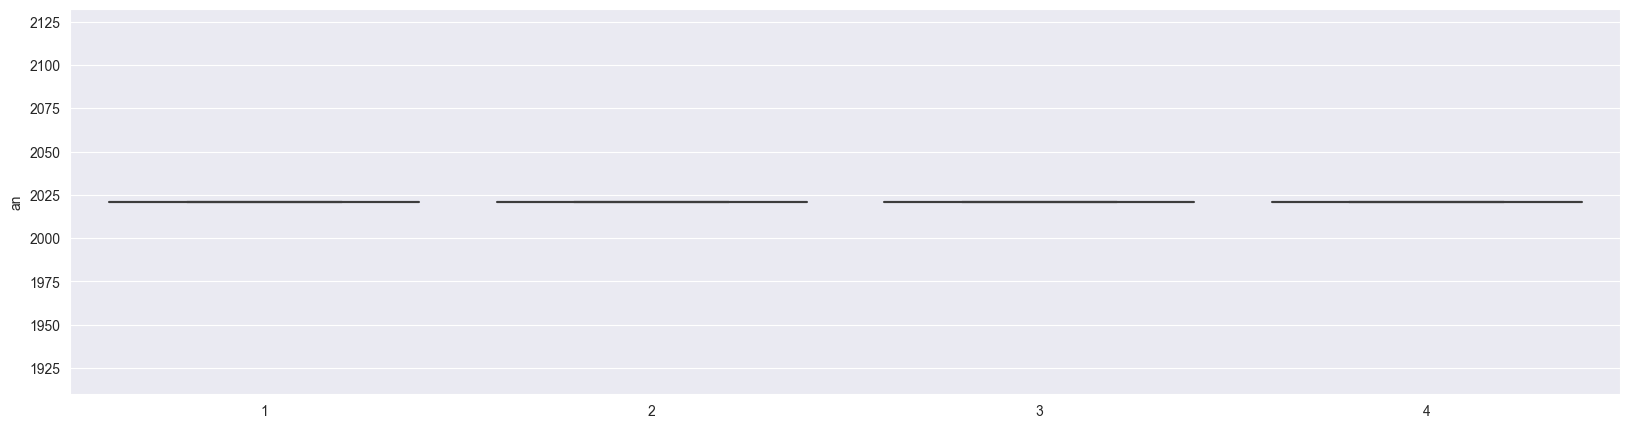

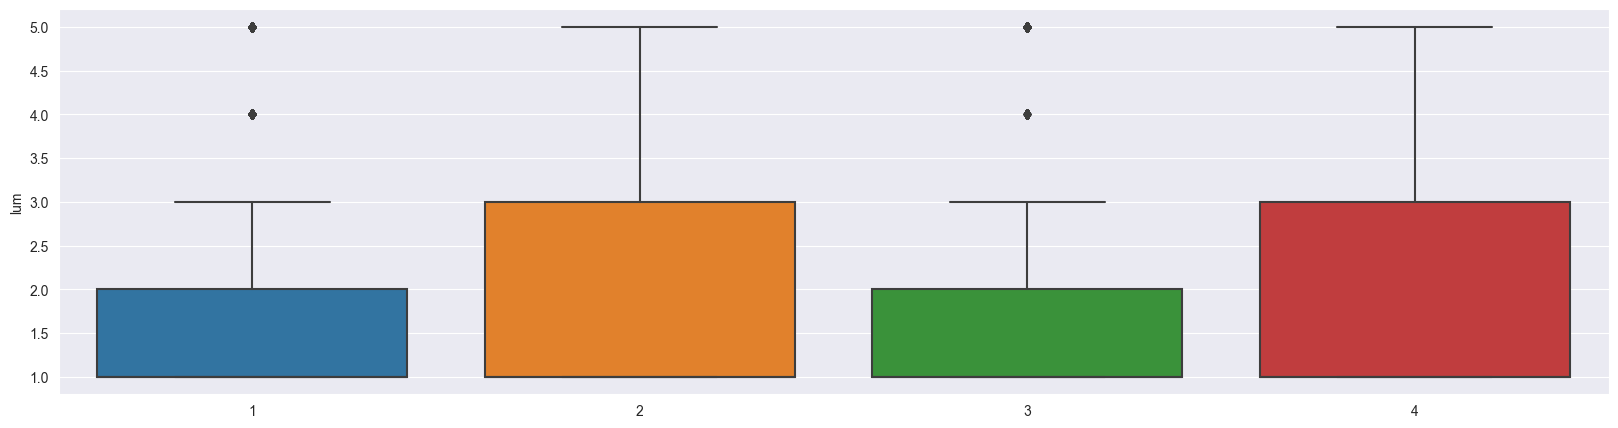

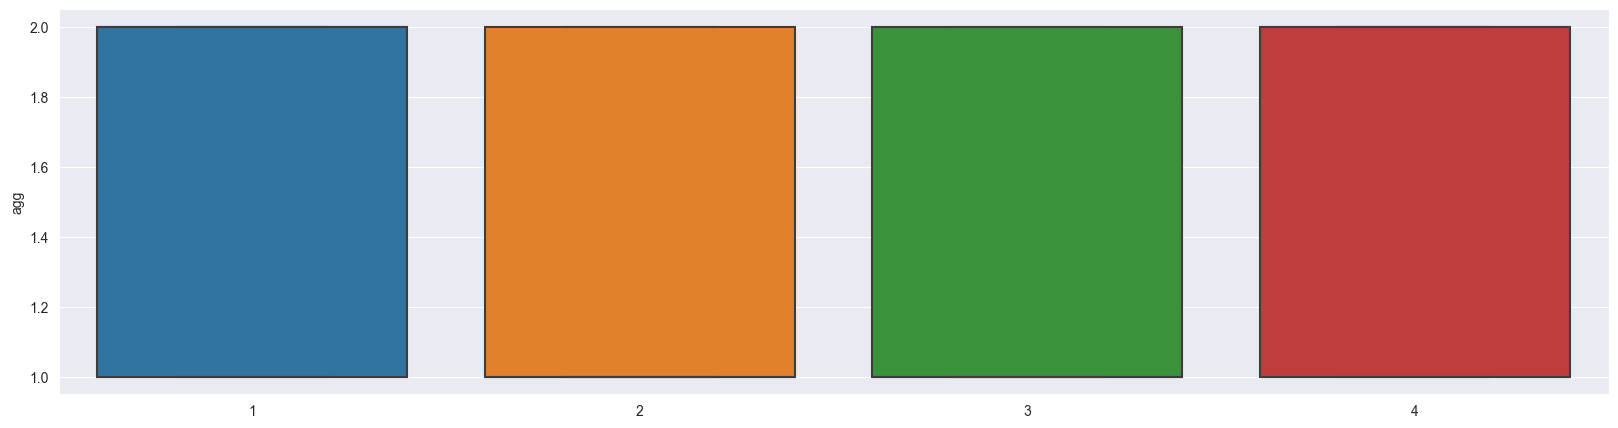

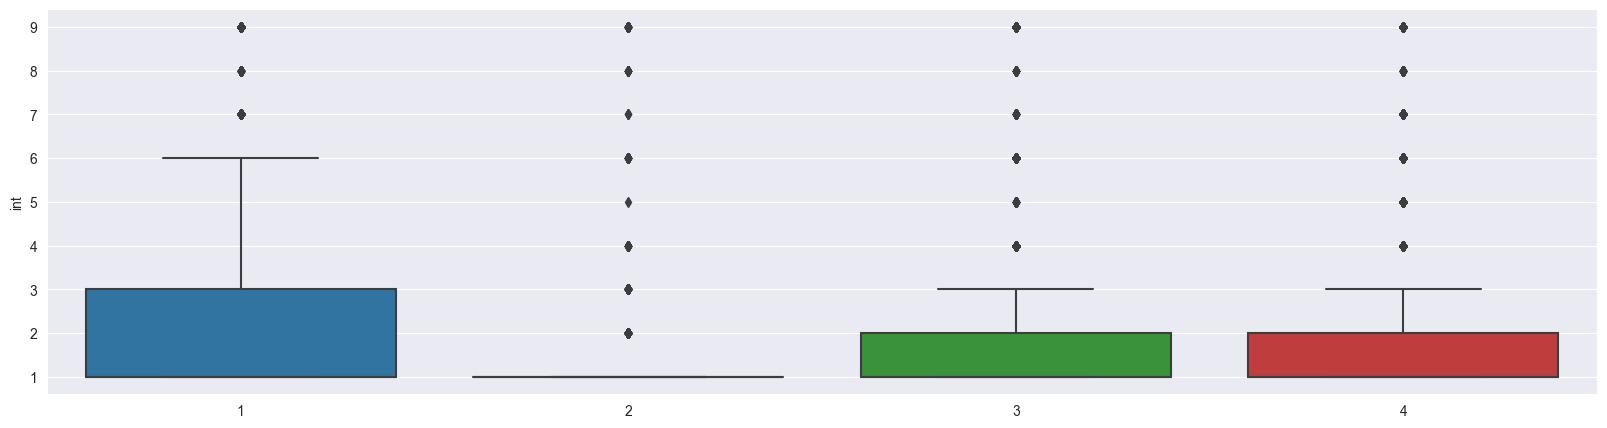

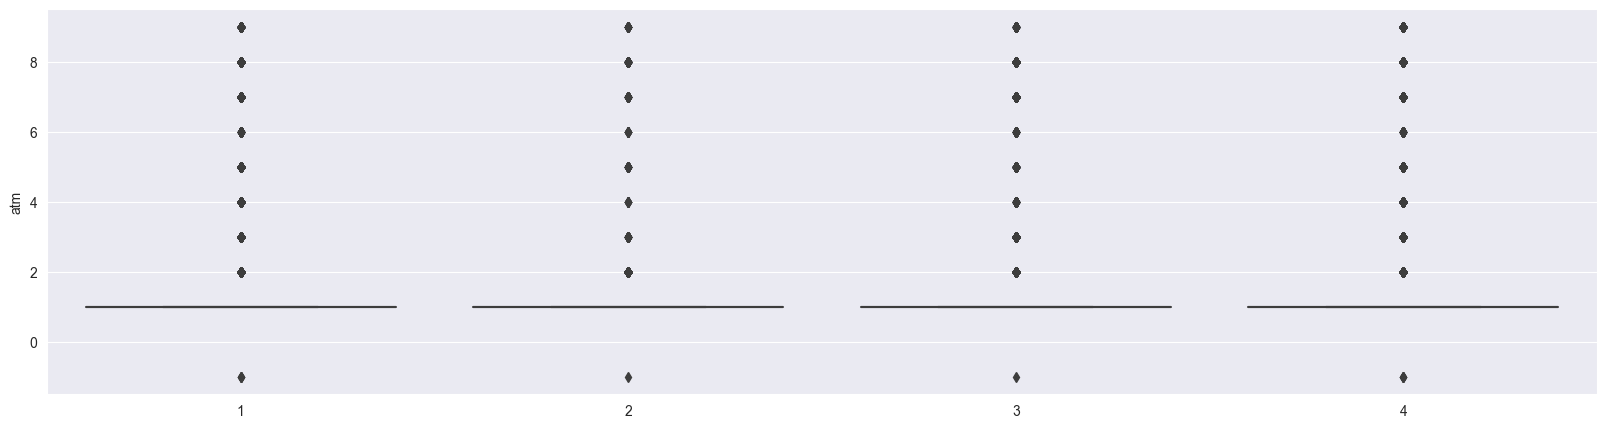

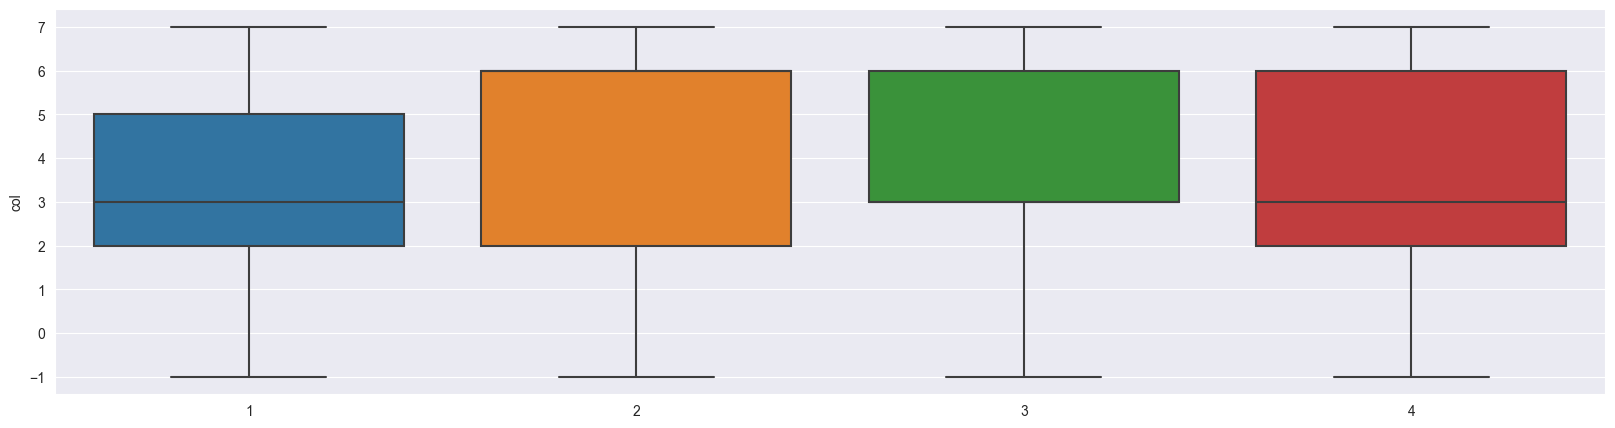

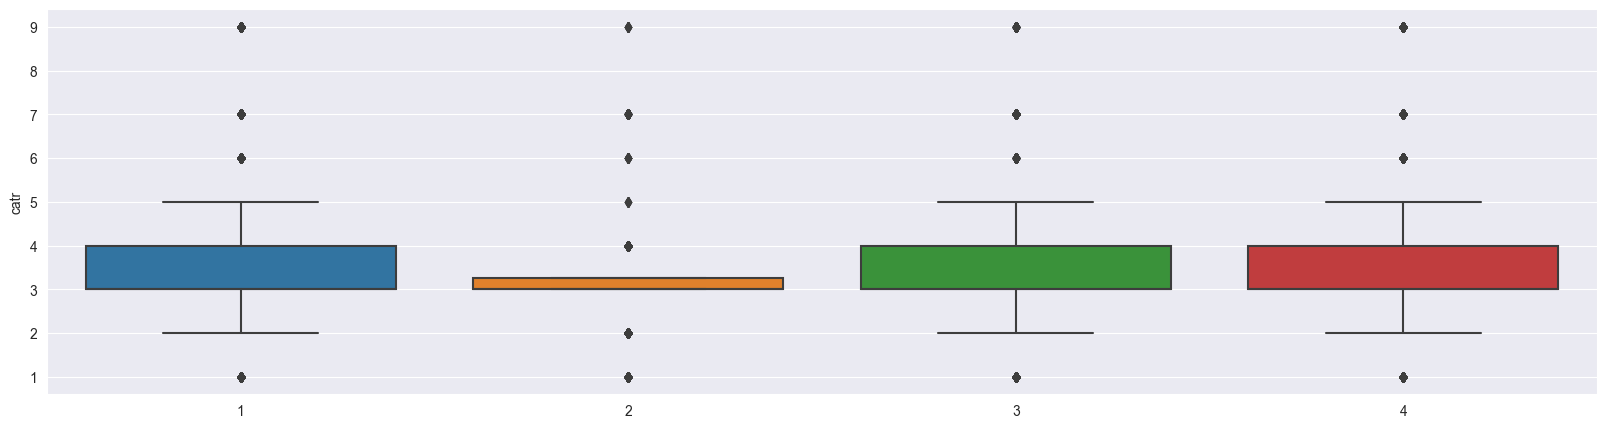

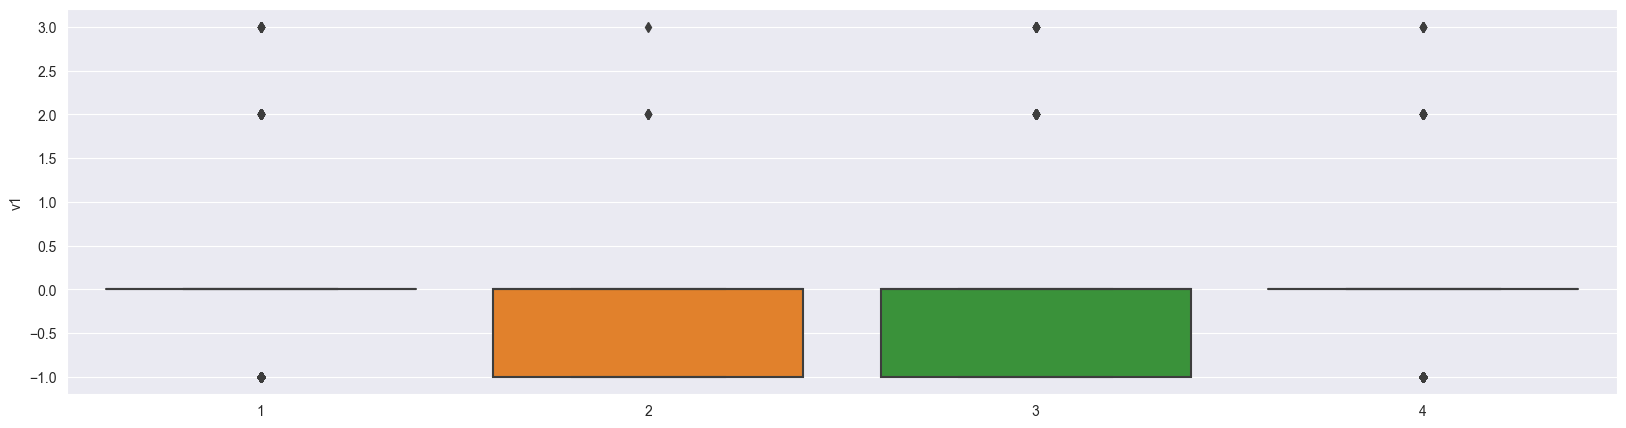

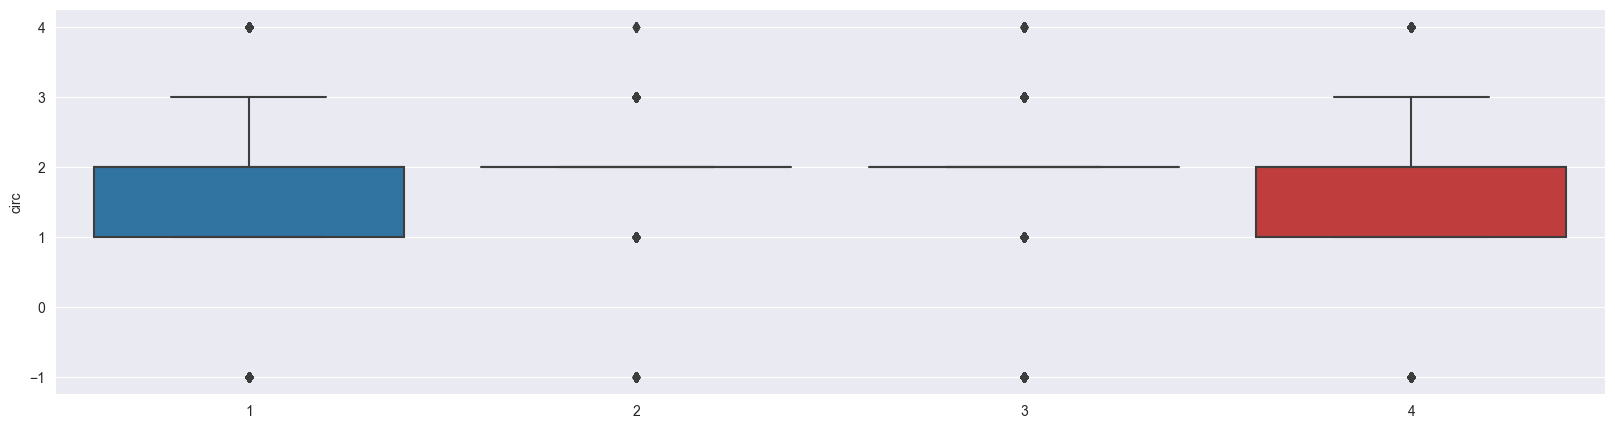

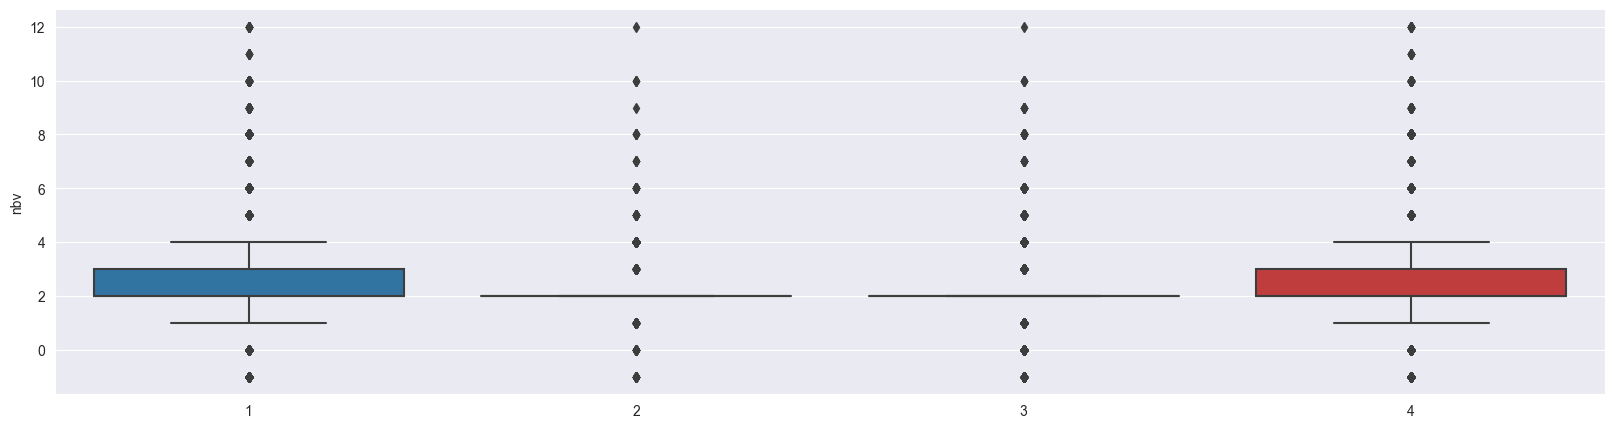

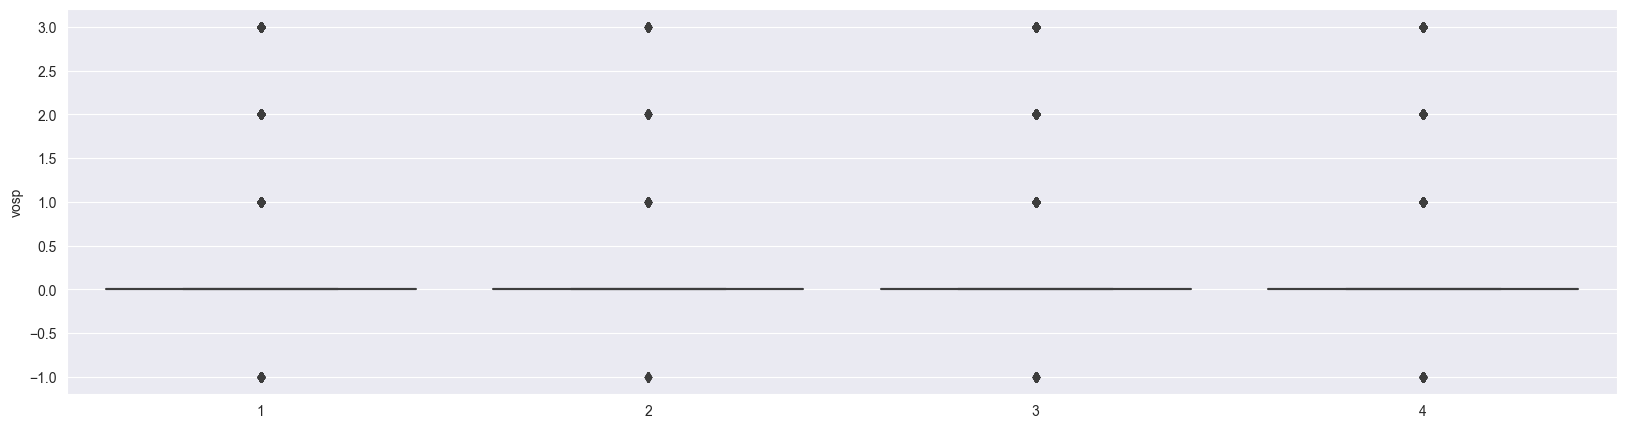

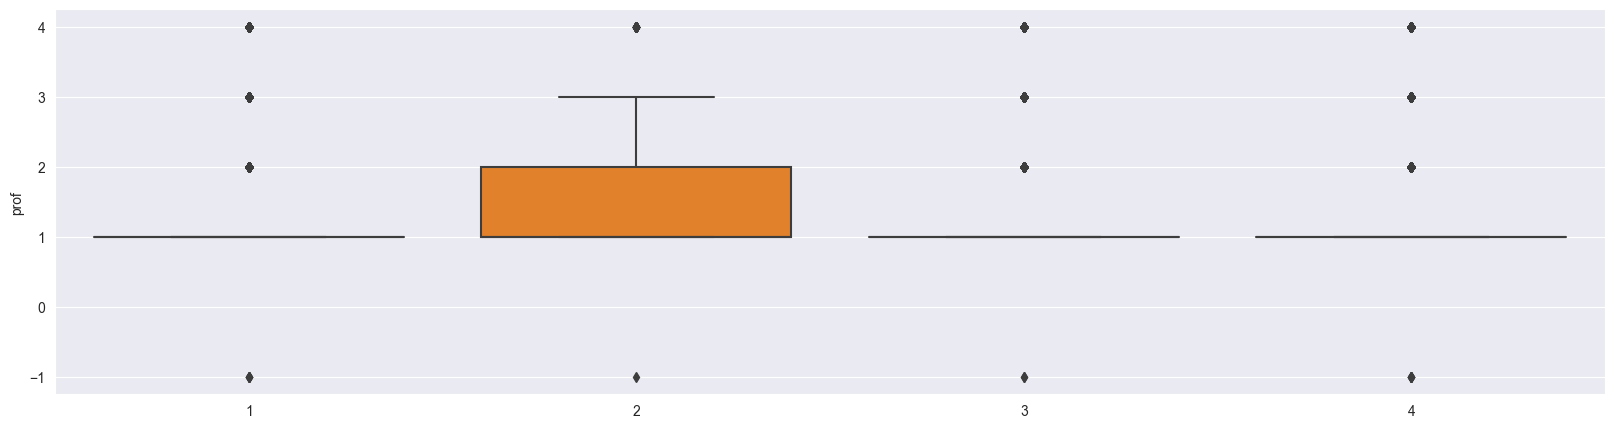

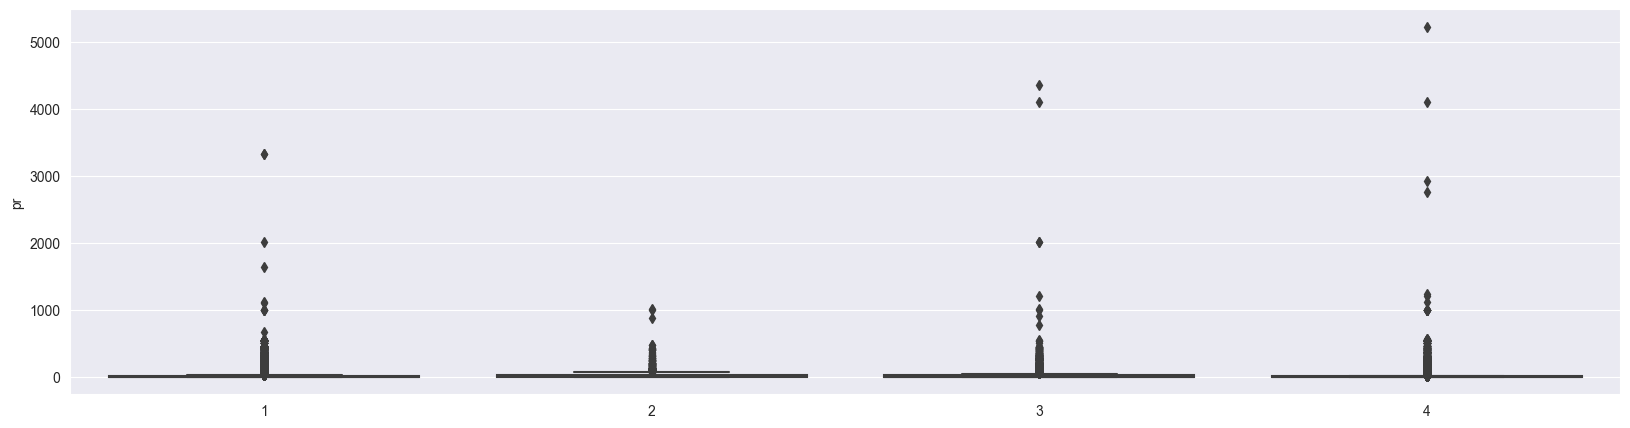

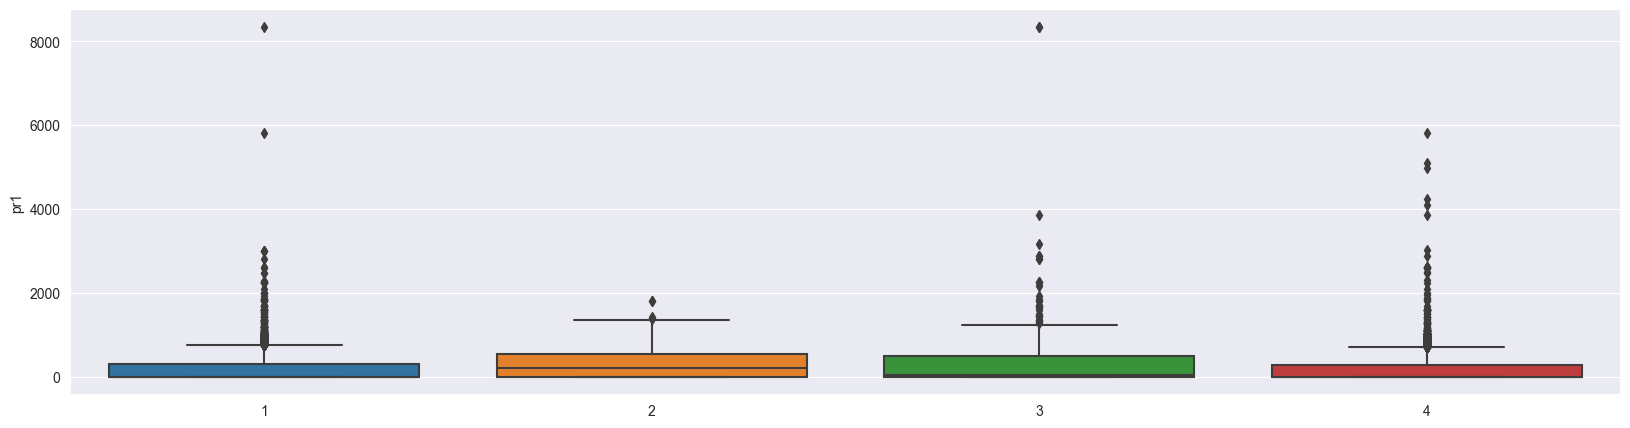

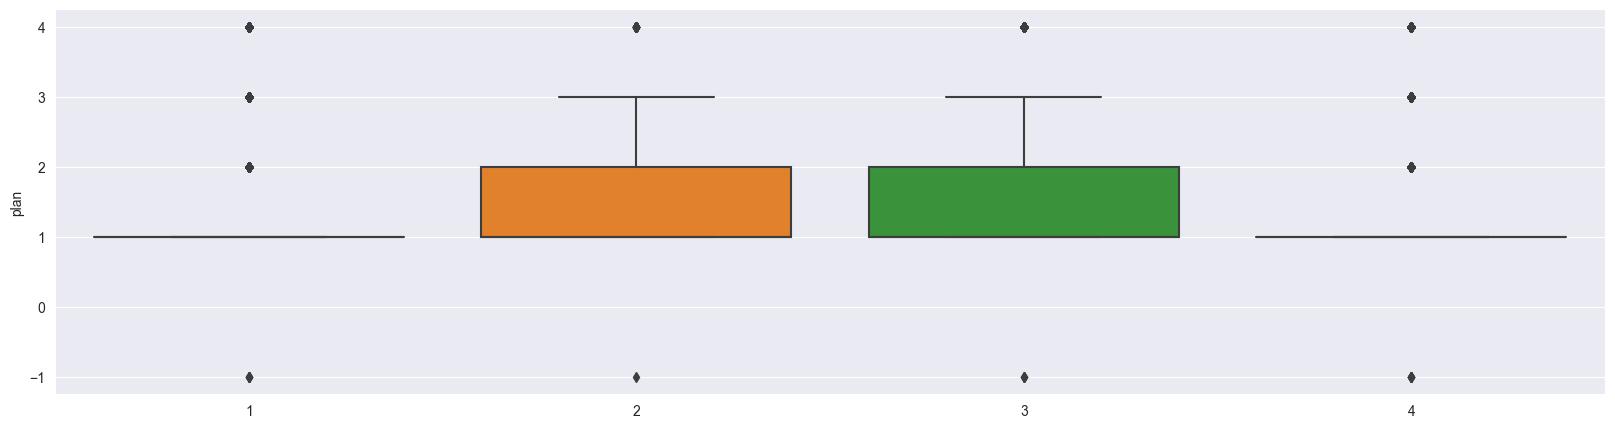

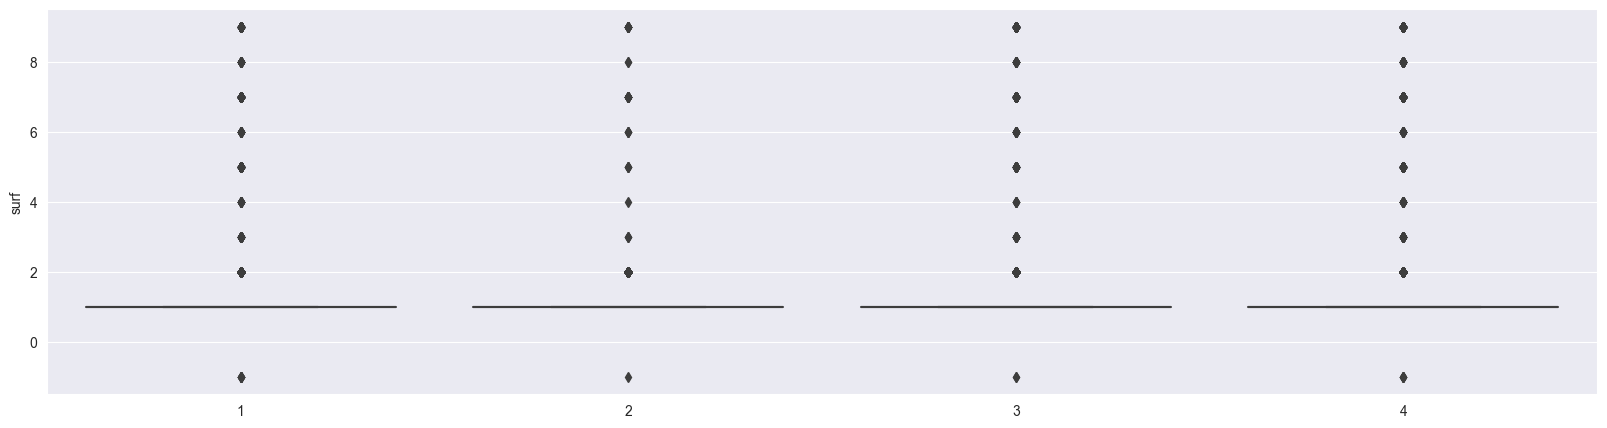

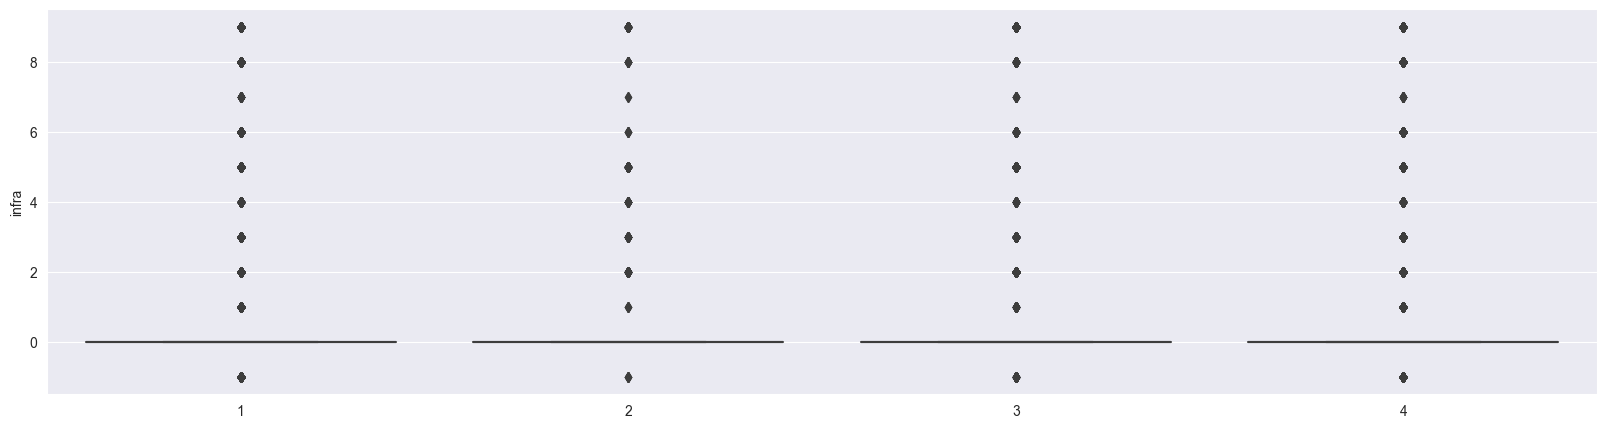

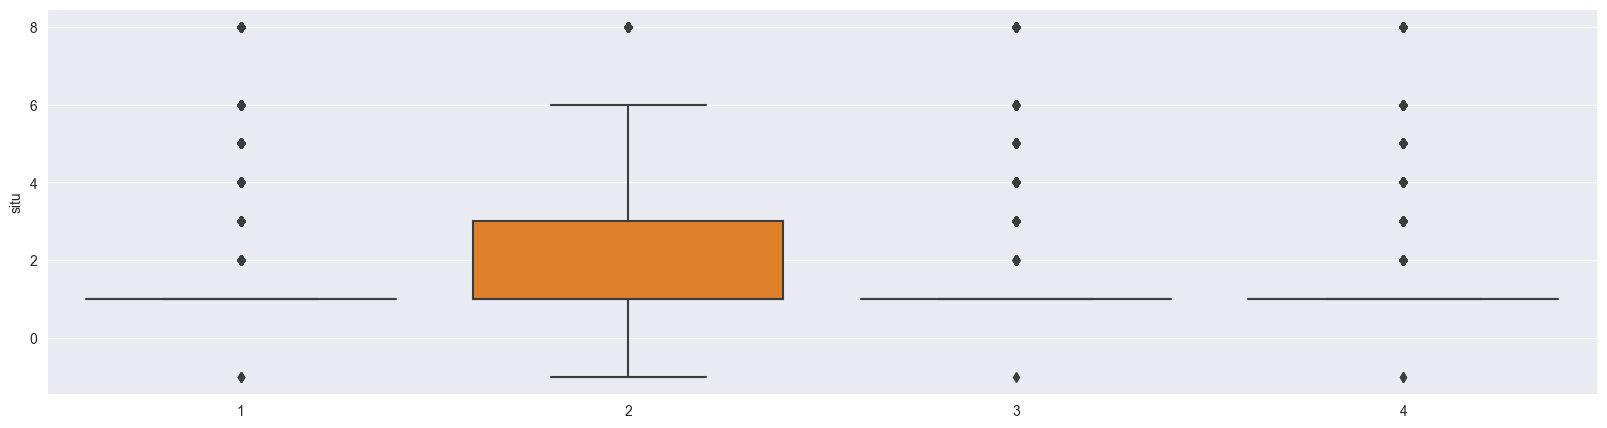

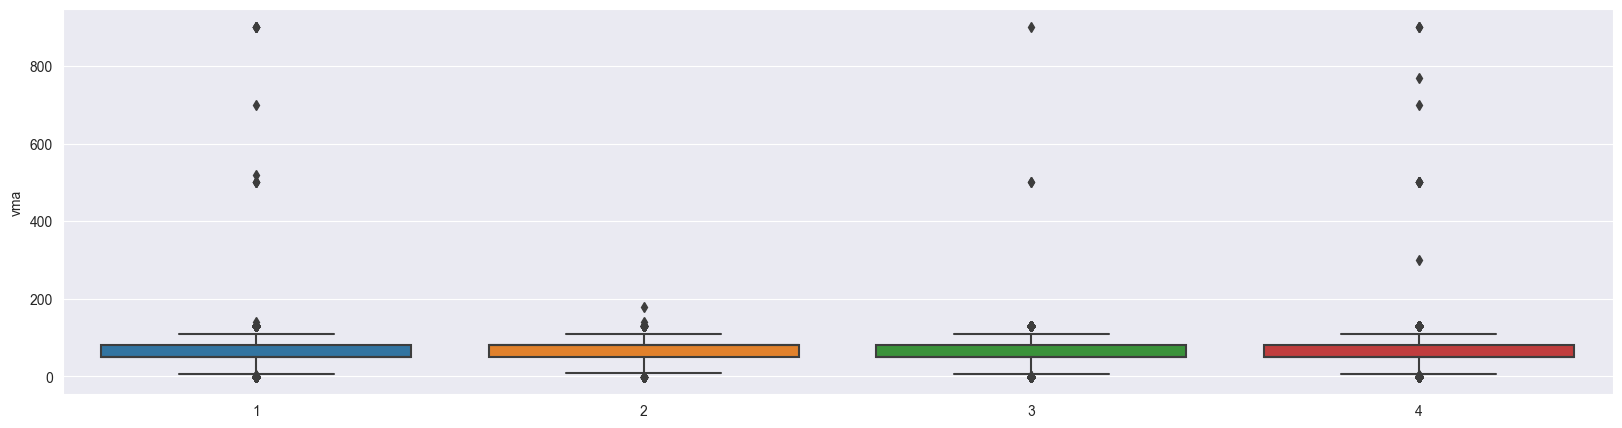

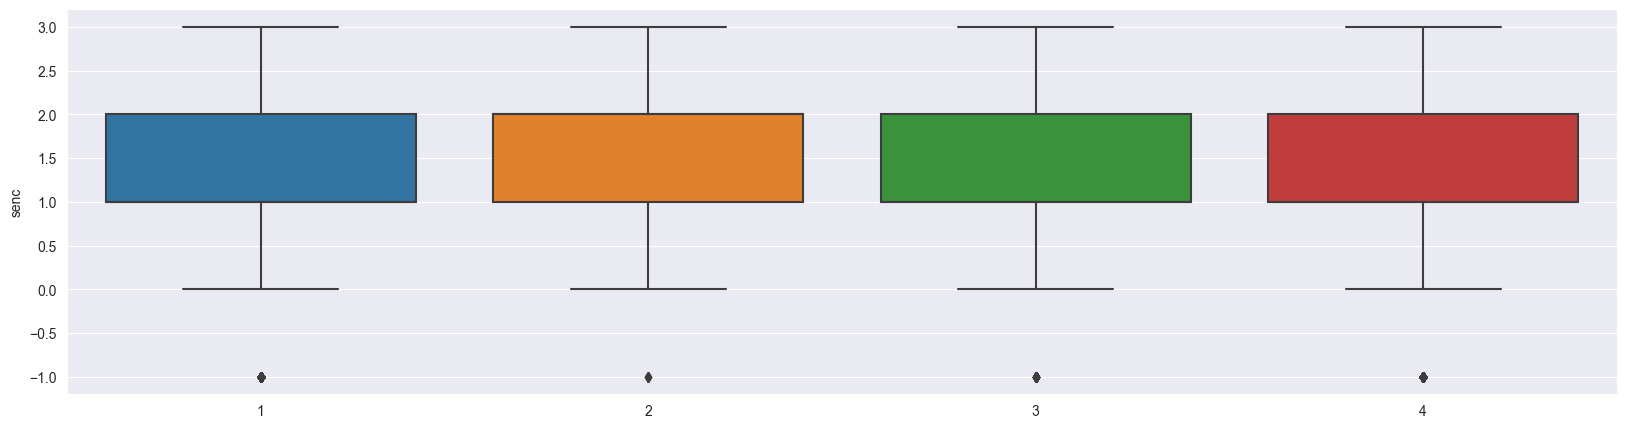

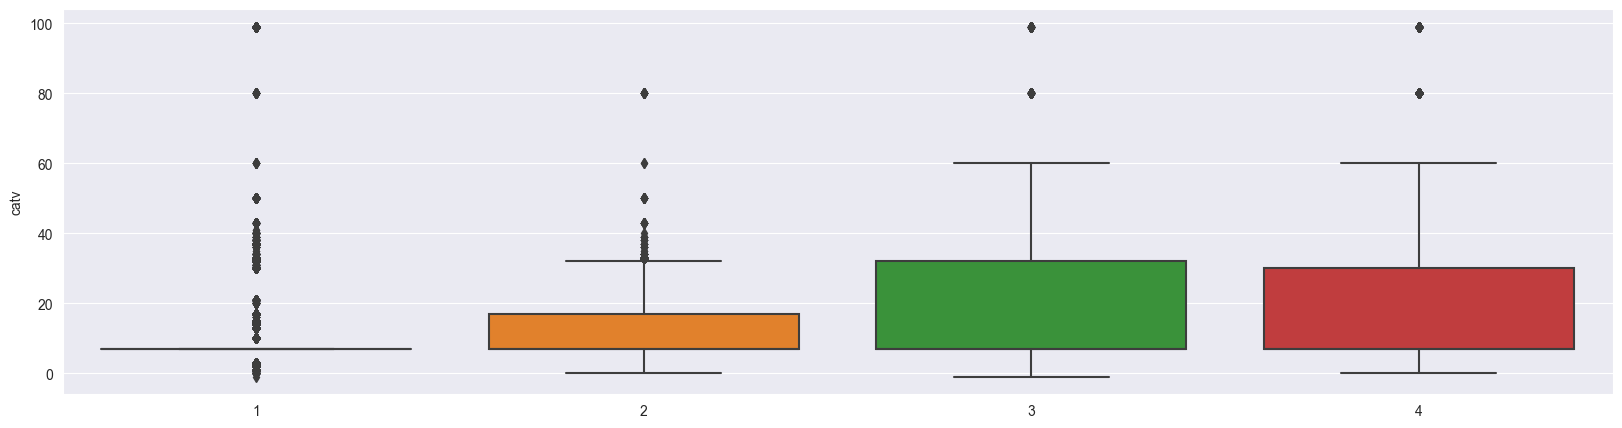

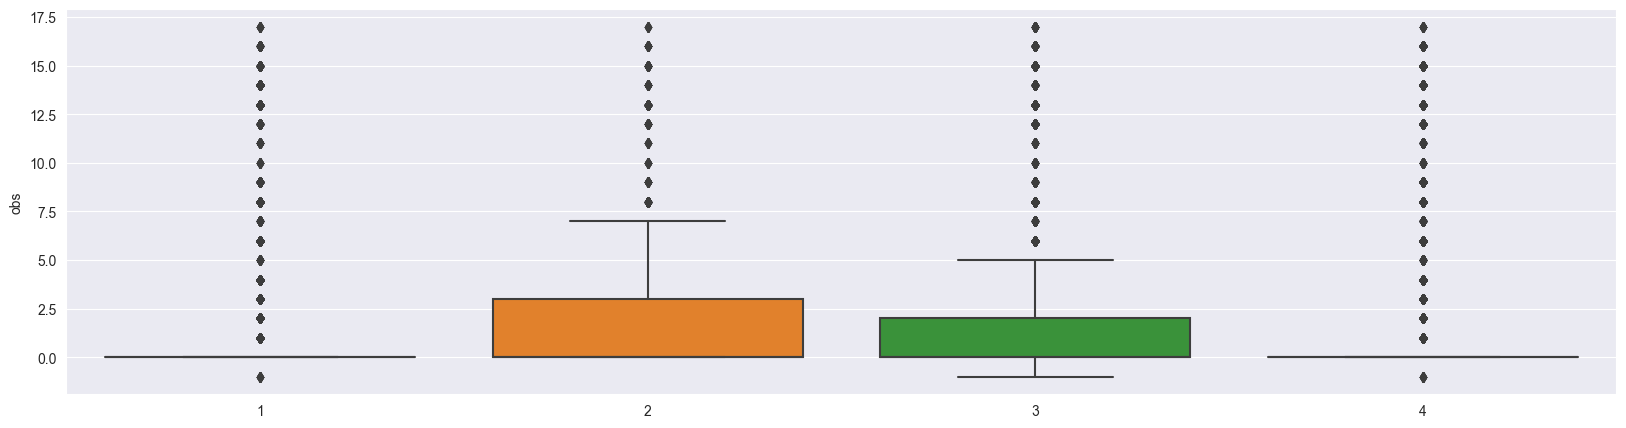

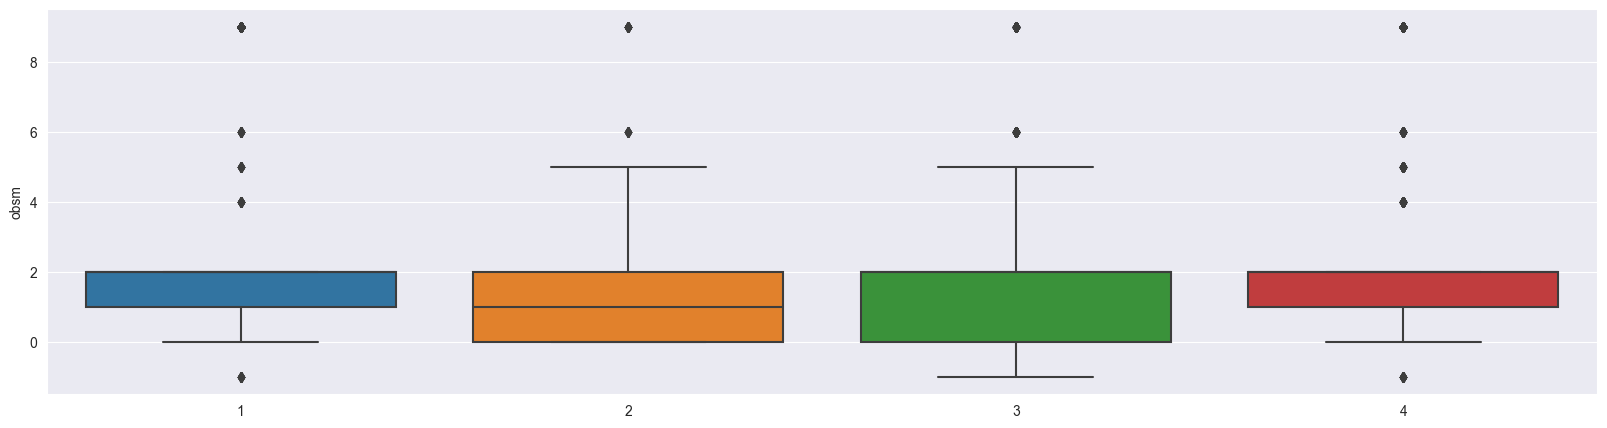

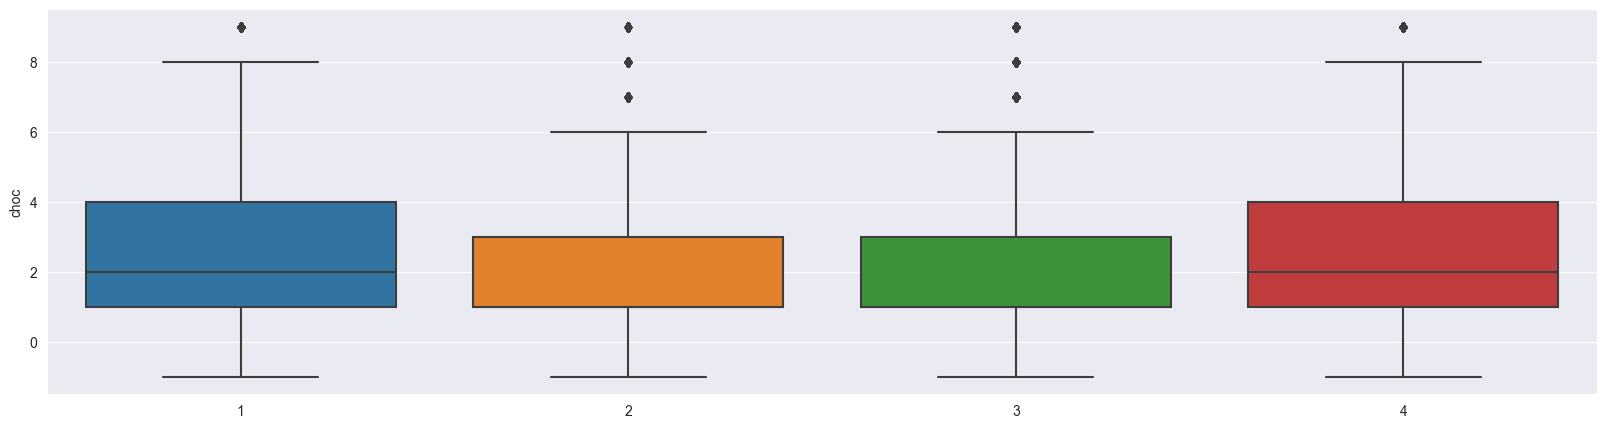

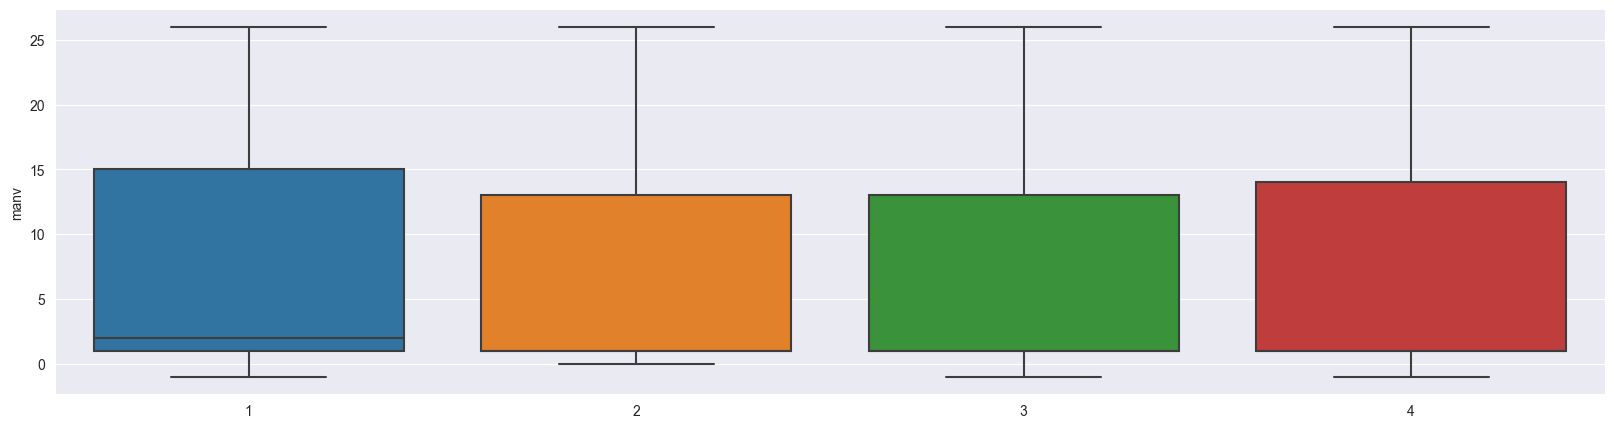

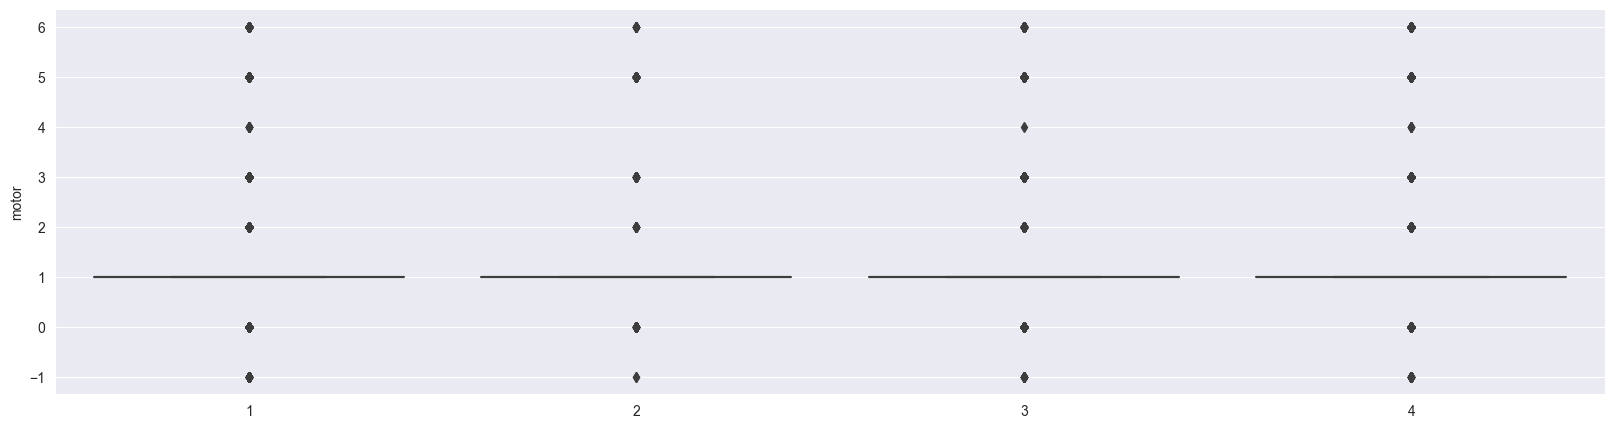

In [17]:
plt.figure(figsize = (20, 5))
for col in data_train.select_dtypes("int"):
  plt.figure(figsize = (20, 5))
  sns.boxplot(x=labels_train, y=data_train[col])

plt.show()

* **At first glance, we can see that some features have outliers, but we need to study it further and see if these outliers represent a specific class.**

<Figure size 2000x500 with 0 Axes>

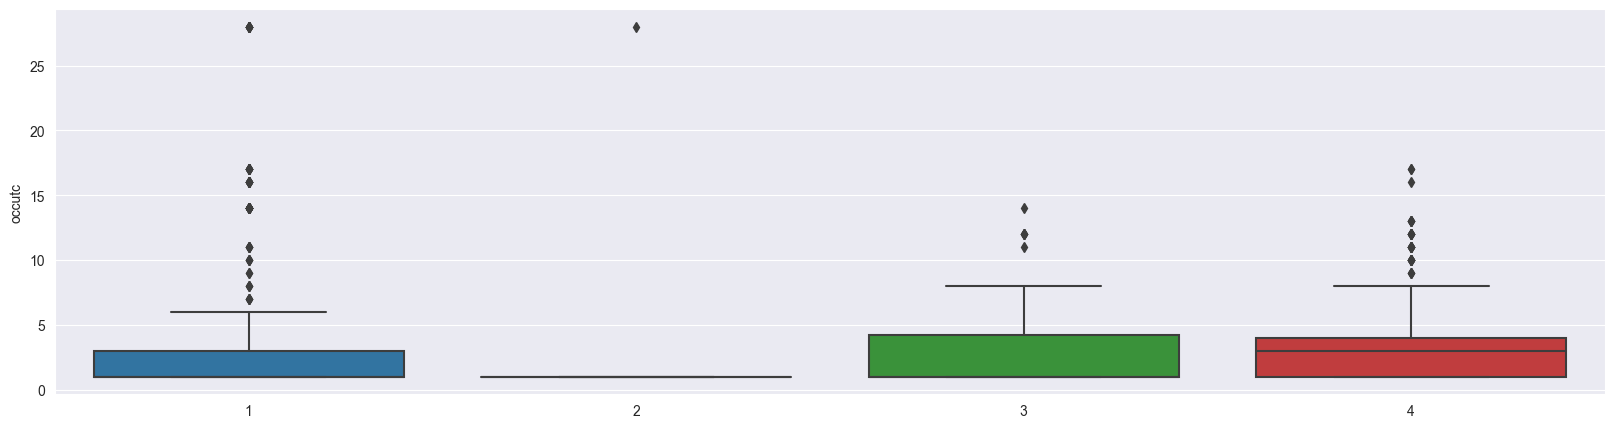

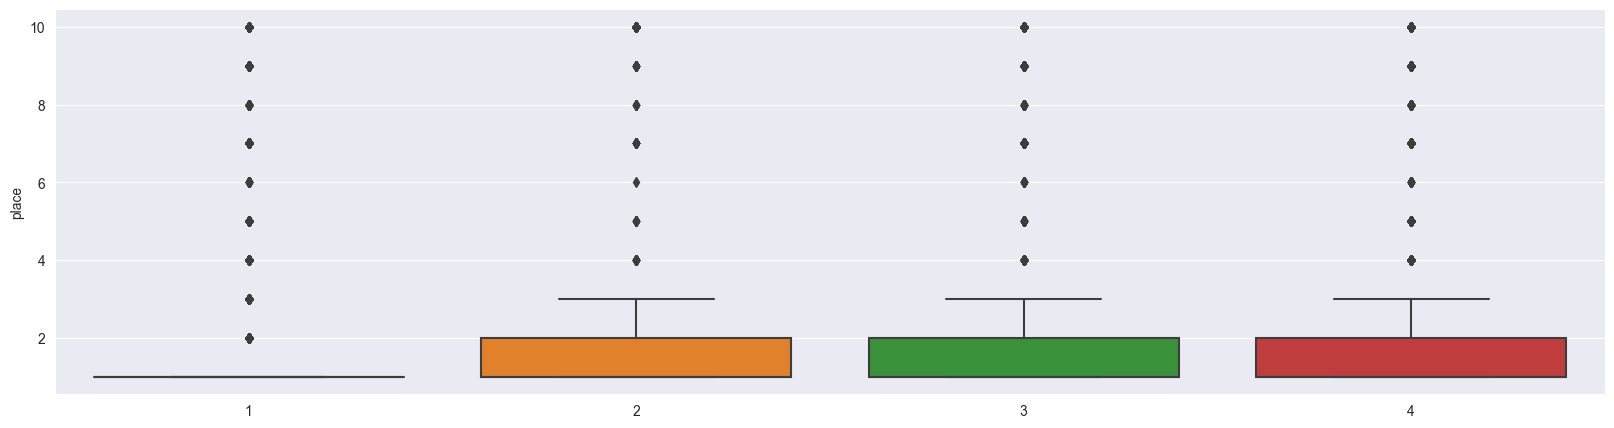

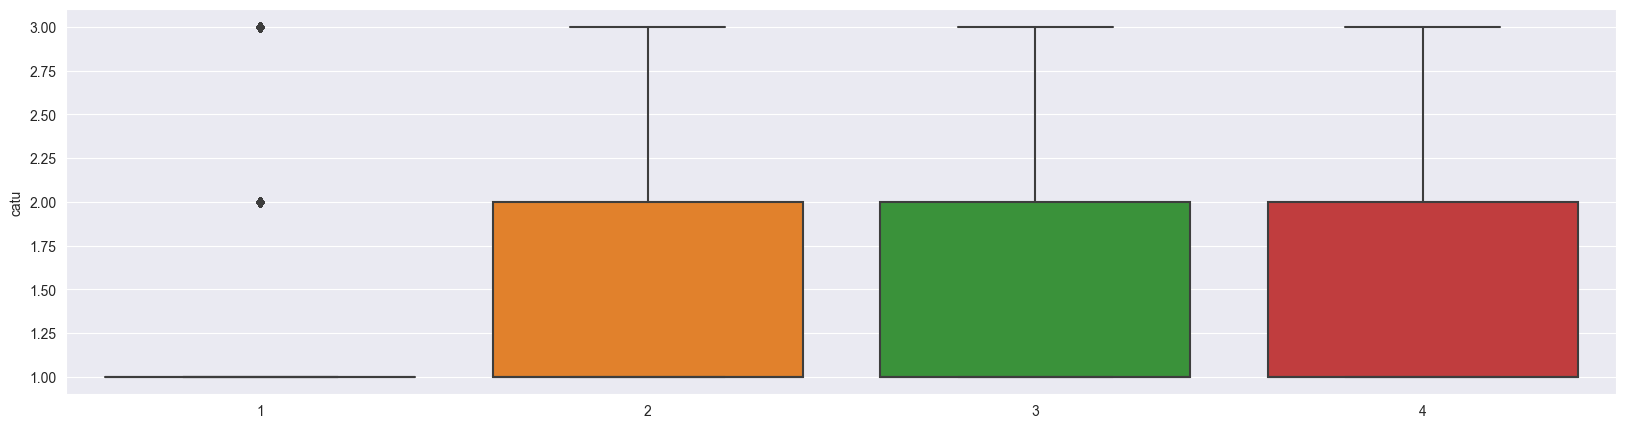

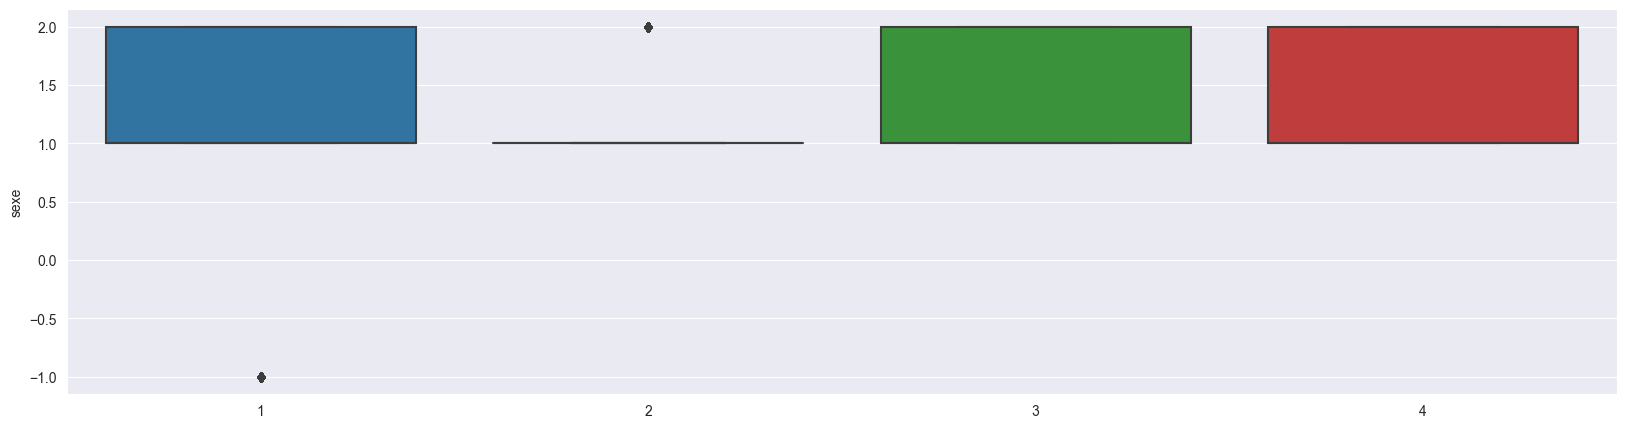

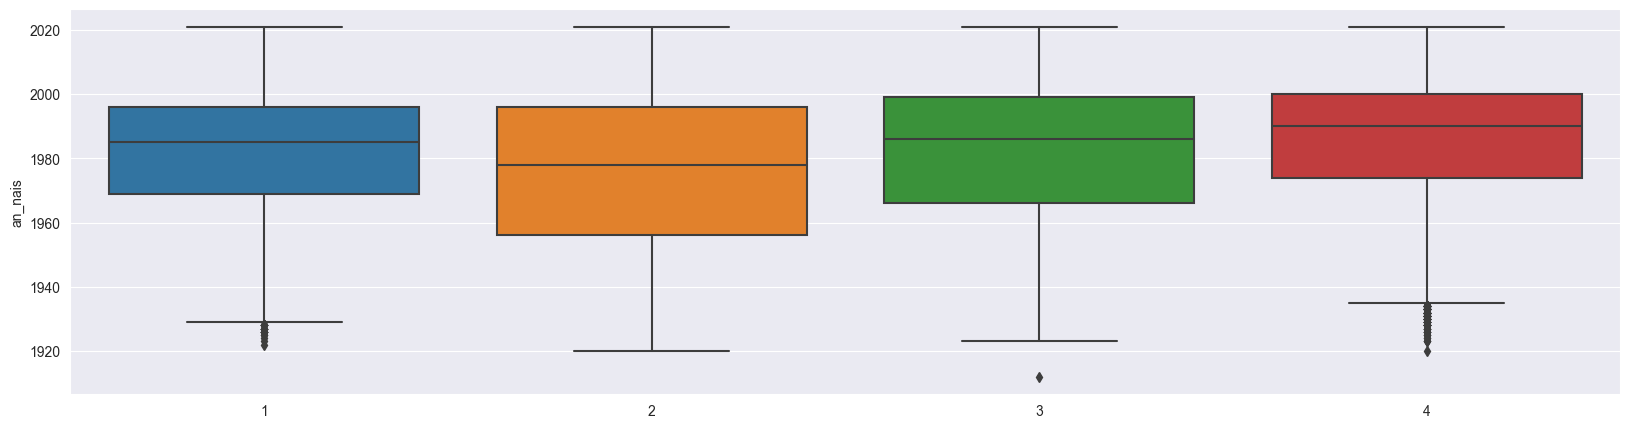

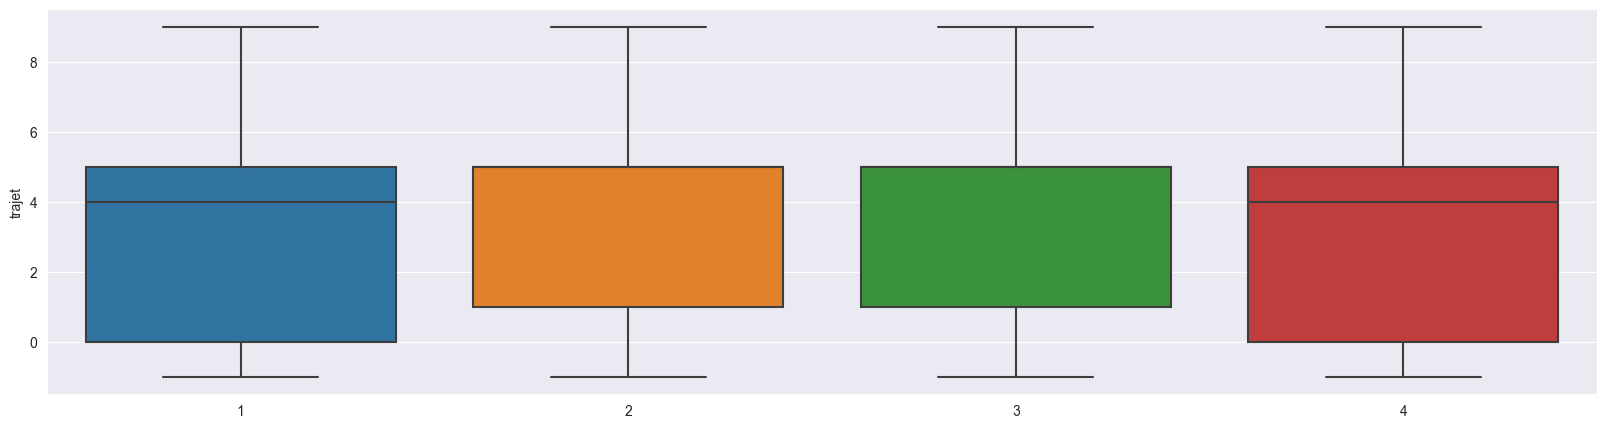

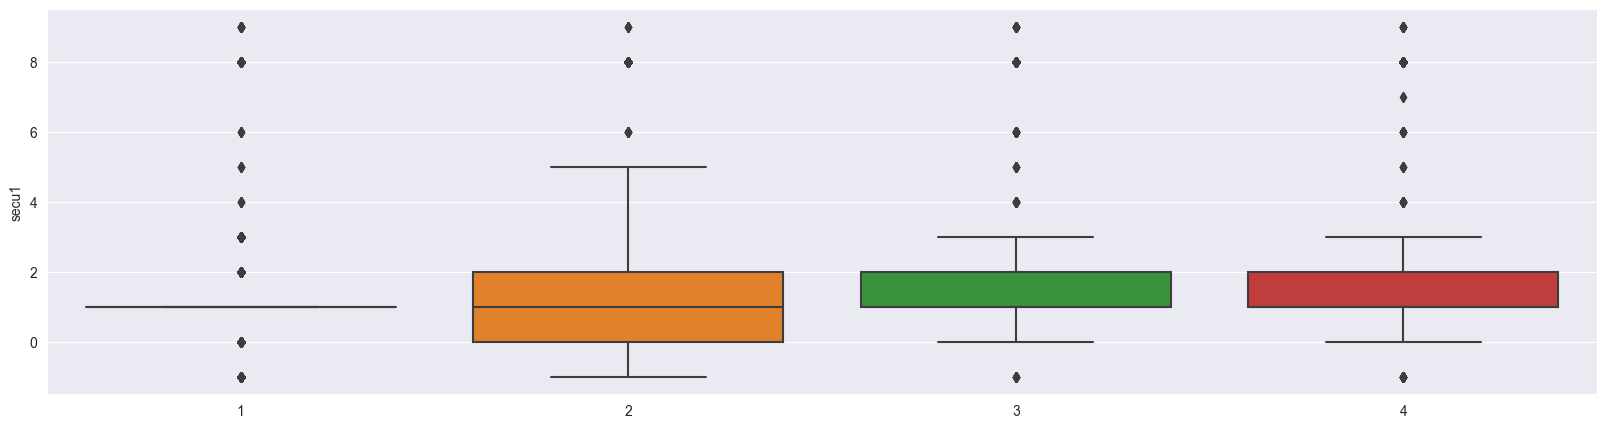

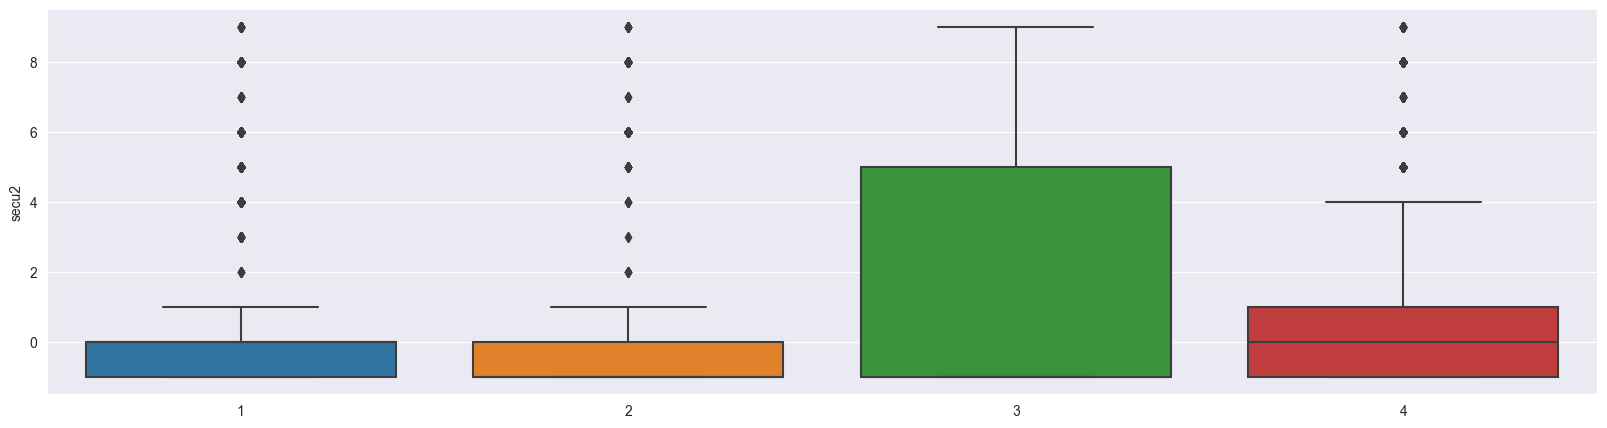

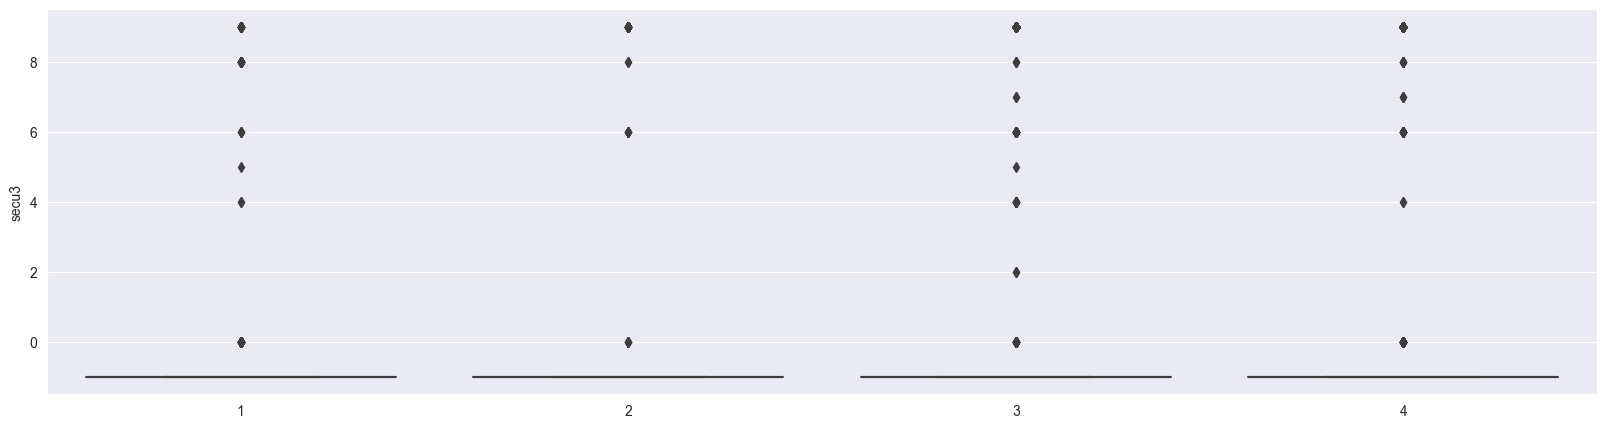

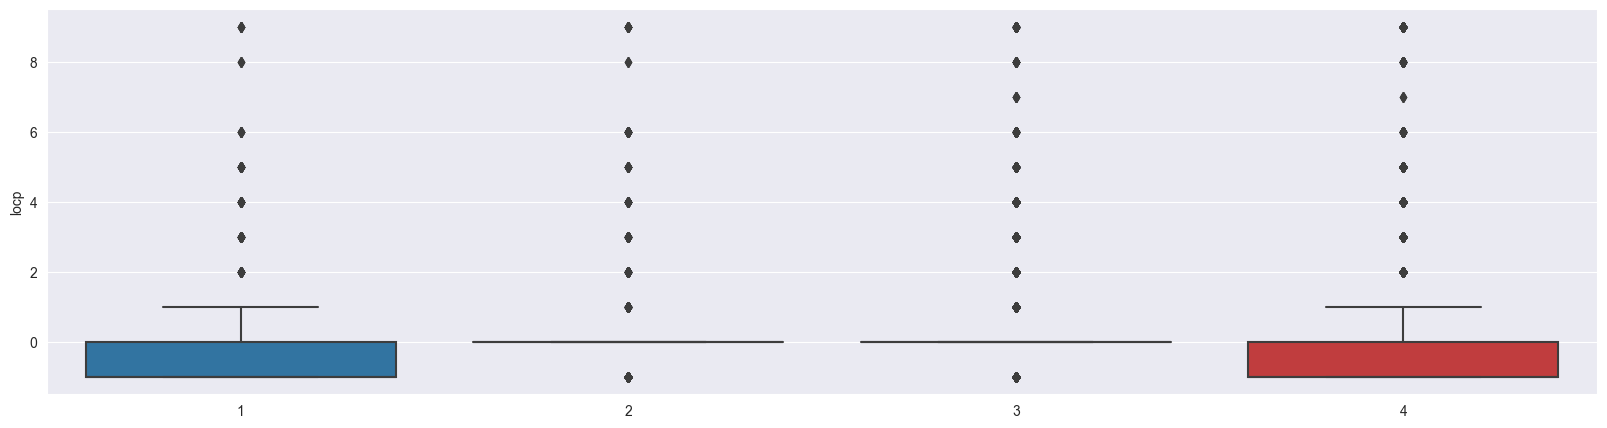

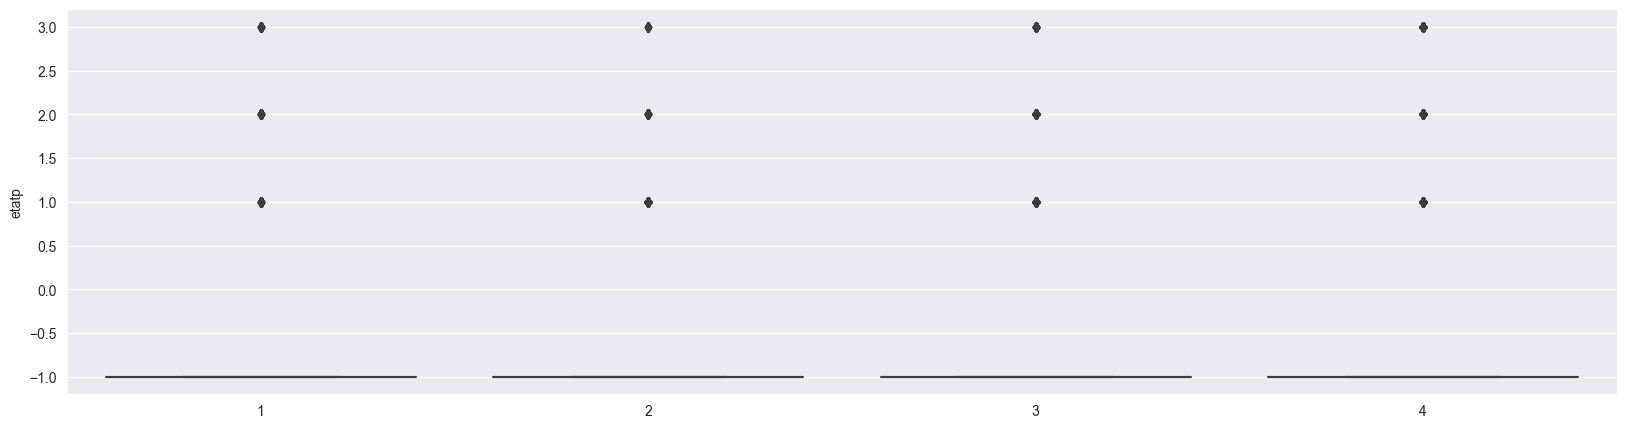

In [18]:
plt.figure(figsize = (20, 5))
for col in data_train.select_dtypes("float"):
  plt.figure(figsize = (20, 5))
  sns.boxplot(x=labels_train, y=data_train[col])

plt.show()

## Relation: Target & Categorical features

In this part we will visualize our categorical features distribution and relationship with the target.

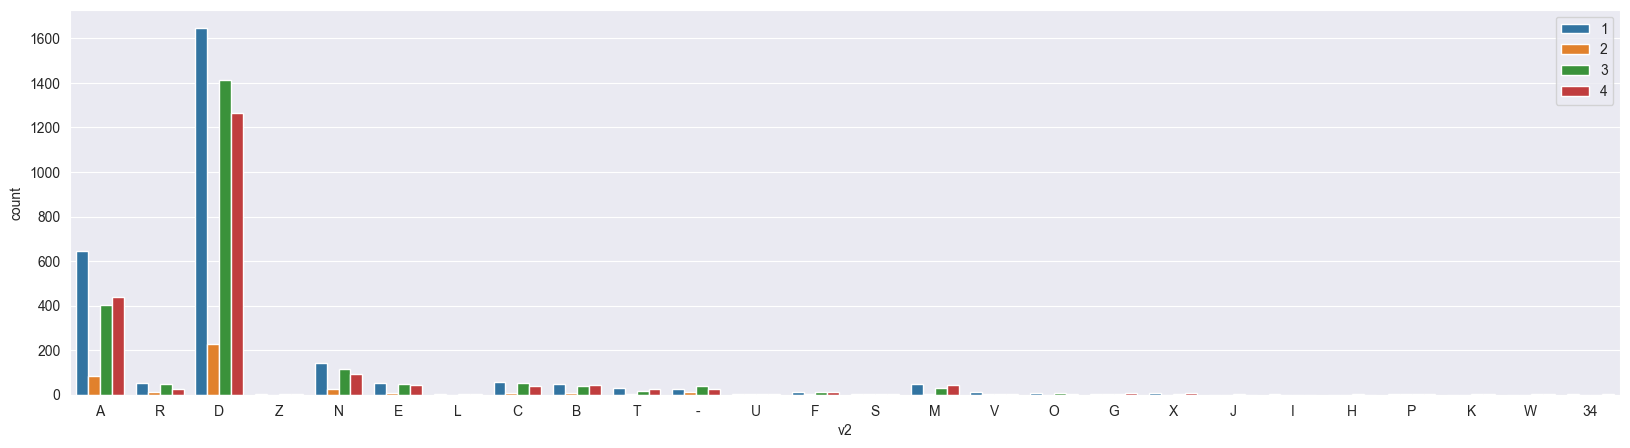

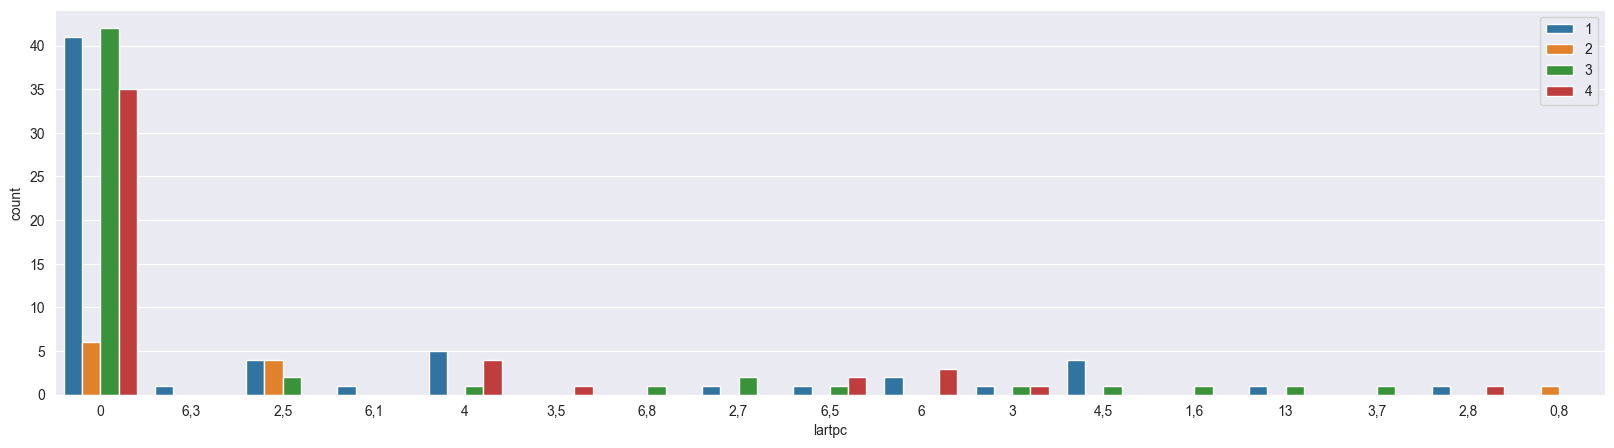

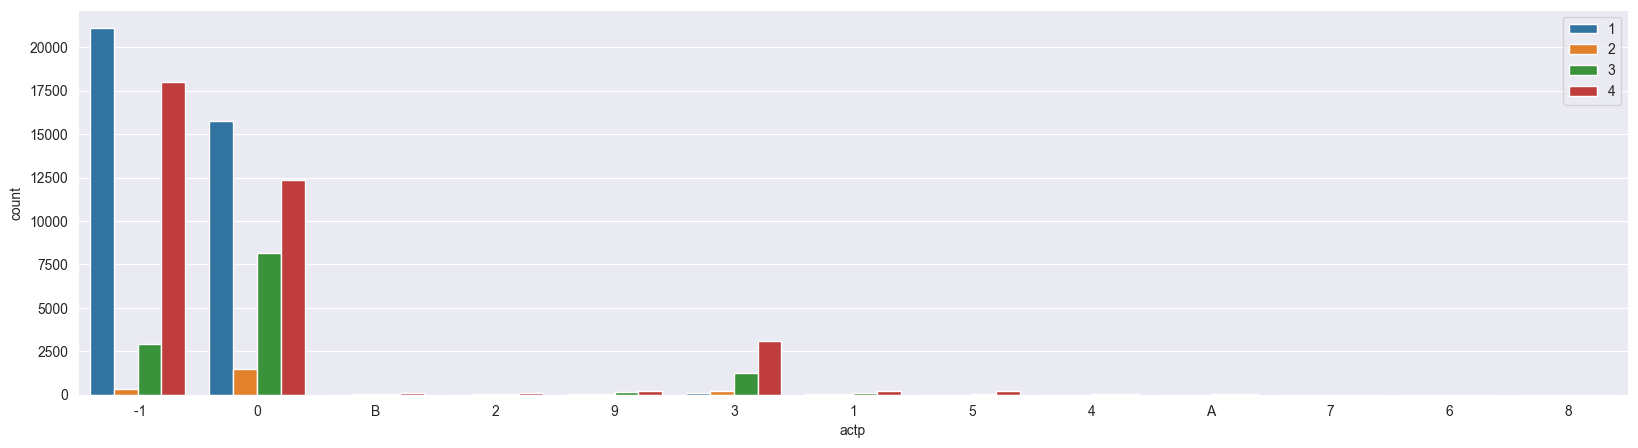

In [19]:
# Extract categorical features that have at most 21 categories
columns = data_train.select_dtypes("object").columns[data_train.select_dtypes("object").nunique()<=26]

#visualize their relationship with the target
for col in columns:
  plt.figure(figsize=(20,5))
  sns.countplot(x=data_train[col], hue=labels_train)

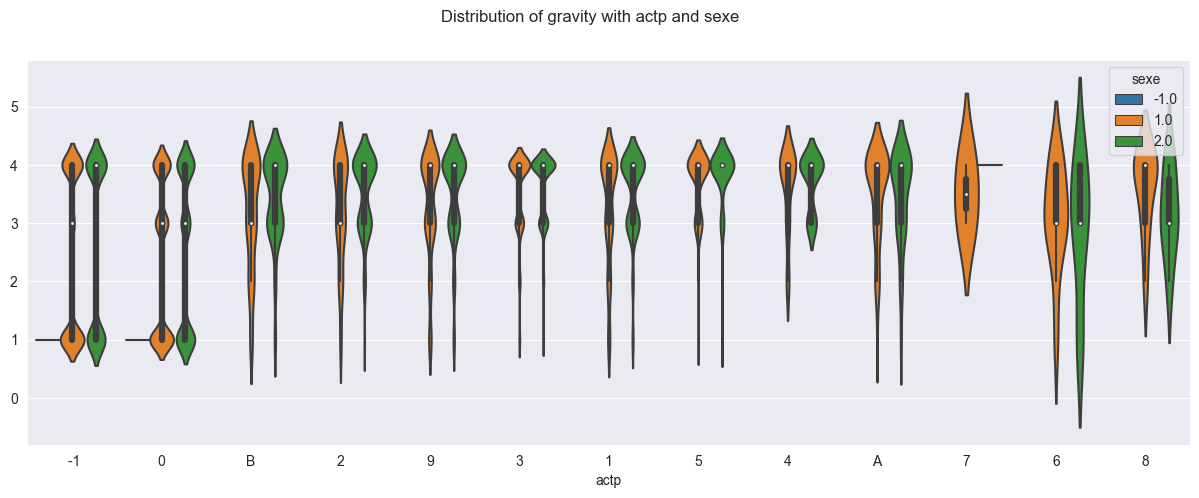

In [20]:
plt.figure(figsize=(15,5))
sns.violinplot(data=data_train, x="actp", y=labels_train, hue="sexe")
plt.suptitle("Distribution of gravity with actp and sexe")
plt.show()

# Feature engineering



*   Dealing with missing Data
* Transformation of features
*   Encoding Categorical features



## Missing Values

As seen above, we can remove columns with missing values rate superior to 90% of the data.

In [21]:
# Drop columns with high number of missing values
na_columns = data_train.columns[data_train.isnull().sum()/data_train.shape[0]>0.9]
data_train = data_train.drop(columns=na_columns)
print(f"The new dimensions after removing the columns with missing values are: {data_train.shape}")

The new dimensions after removing the columns with missing values are: (86492, 50)


For columns with missing values with rate less than 90%, you can choose the suitable method (removing rows with nan values, imputing the missing values...)

Here we are going to remove the rows with missing values. But, you are free to try something else. Make sure you don't have NaN values in the test dataset.

In [22]:
# Drop raws
data_train = data_train.dropna()
print(f"The new dimensions after removing the rows are: {data_train.shape}")

The new dimensions after removing the rows are: (77577, 50)


## Transformation of some features

### Colonne hrmn (heure de la forme hh:mm)

In [23]:
data_train['heure'] = [int(str(i).split(':')[0]) for i in data_train['hrmn']]
data_train['hour_sin'] = np.sin(data_train.heure*(2.*np.pi/24))
data_train['minutes'] = [int(str(i).split(':')[1]) for i in data_train['hrmn']]
data_train['hour_cos'] = np.cos(data_train.heure*(2.*np.pi/24))
data_train['minute_sin'] = np.sin(data_train.minutes*(2.*np.pi/60))
data_train['minute_cos'] = np.cos(data_train.minutes*(2.*np.pi/60))

del data_train['hrmn']
del data_train['heure']
del data_train['minutes']

### Convert long (longitude) and lat (latitude) to the correct format

In [24]:
# Converting the columns lat and long to float instead of object:
data_train["lat"] = [float(str(i).replace(",", ".")) for i in data_train["lat"]]
data_train["long"] = [float(str(i).replace(",", ".")) for i in data_train["long"]]

### Format the larrout feature (The width of the roadway used for vehicular traffic, excluding hard shoulder, TPCs and parking spaces)

In [25]:
data_train['larrout'] = data_train['larrout'].str.replace(",", ".").astype(float)

## Removing useless features

* We can drop the **id_vehicule** and **Num_Acc** column since it has no effect on the model.
* We can drop the **adr** and **voie** columns since they can be replaced by the columns lat and long
* We can drop the **an** column since we have only data of 2021.

In [26]:
columns_to_drop = ['id_vehicule', 'Num_Acc', 'adr', 'voie', 'an']
data_train = data_train.drop(columns=columns_to_drop )
print(f"The new dimensions after removing the columns are: {data_train.shape}")

The new dimensions after removing the columns are: (77577, 48)


## Correlation Analysis

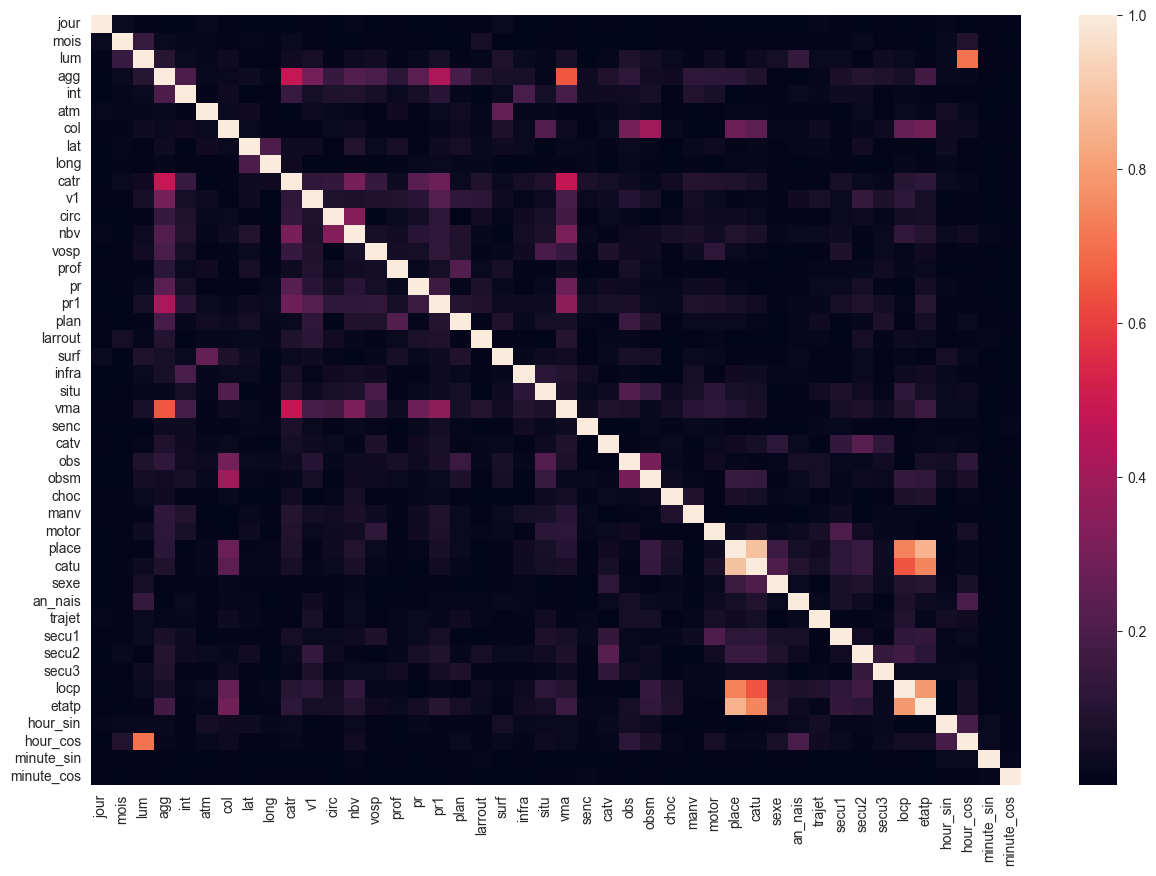

In [27]:
# Compute the correlation matrix and display it
cov_matrix = data_train.corr(numeric_only=True).abs()
plt.figure(figsize=(15, 10))
sns.heatmap(cov_matrix)
plt.show()

We consider that two features are correlated if they have a cov more than 0.85. In this case we can drop one of them.

In [28]:
# Dropping correlated features
upper_tri = cov_matrix.where(np.triu(np.ones(cov_matrix.shape),k=1).astype(bool))
columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
data_train = data_train.drop(columns=columns_to_drop)
print(f"We dropped the following columns: {columns_to_drop}")
print(f"The new dimensions after removing the columns are: {data_train.shape}")

We dropped the following columns: ['catu', 'etatp']
The new dimensions after removing the columns are: (77577, 46)


## Encoding

In [29]:
# Check the object features
object_col = data_train.select_dtypes("object").columns
print("The categorical features -- number of unique values:")
for col in object_col:
  print(f'{col :-<50} {data_train[col].nunique()}')

The categorical features -- number of unique values:
dep----------------------------------------------- 107
com----------------------------------------------- 9138
num_veh_veh--------------------------------------- 44
actp---------------------------------------------- 13


* We used frequency encoding because each variable has many unique values. Therefore, it will be tedious to use a one hot encoder since it will greatly increase the size of our feature space.

In [30]:
# Check the numerical features
num_col = data_train.select_dtypes(exclude="object").columns
print("The numerical features -- number of unique values:")
for col in num_col:
  print(f'{col :-<50} {data_train[col].nunique()}')

The numerical features -- number of unique values:
jour---------------------------------------------- 31
mois---------------------------------------------- 12
lum----------------------------------------------- 5
agg----------------------------------------------- 2
int----------------------------------------------- 9
atm----------------------------------------------- 10
col----------------------------------------------- 8
lat----------------------------------------------- 43417
long---------------------------------------------- 43664
catr---------------------------------------------- 8
v1------------------------------------------------ 4
circ---------------------------------------------- 5
nbv----------------------------------------------- 14
vosp---------------------------------------------- 5
prof---------------------------------------------- 5
pr------------------------------------------------ 429
pr1----------------------------------------------- 1101
plan---------------------------

* We can scale features that have more than 40 unique value.

In [31]:
num_col = [col for col in num_col if data_train[col].nunique()>40]
print("The numerical features to sclae:")
num_col

The numerical features to sclae:


['lat', 'long', 'pr', 'pr1', 'larrout', 'an_nais', 'minute_sin', 'minute_cos']

# Modeling

## Testing data

The testing data can be loaded similarly as follows:

In [39]:
from problem import get_test_data

data_train, labels_train = get_train_data()
data_test, labels_test = get_test_data()

In [40]:
data_test.head()

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,...,catu,sexe,an_nais,trajet,secu1,secu2,secu3,locp,actp,etatp
35727,202100015570,1,10,2021,08:10,2,44,44109,1,1,...,1.0,2.0,1967.0,0.0,1.0,0.0,-1.0,-1.0,-1,-1.0
13072,202100005630,29,11,2021,07:20,5,93,93078,2,2,...,1.0,2.0,2000.0,0.0,1.0,8.0,-1.0,-1.0,-1,-1.0
4568,202100001932,23,12,2021,15:10,1,971,97109,1,1,...,2.0,2.0,2011.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0
11177,202100004800,3,12,2021,16:55,2,06,06088,2,1,...,1.0,2.0,1971.0,0.0,2.0,0.0,-1.0,0.0,0,-1.0
24171,202100010442,30,10,2021,08:21,2,38,38382,2,2,...,1.0,2.0,1996.0,1.0,1.0,-1.0,-1.0,0.0,0,-1.0


## Workflow

### Preprocessing


The submission consists of two files: `feature_preprocessing.py` which defines a `FeaturePreprocessing` class, and `classifier.py` which defines a `Classifier` class

- `FeaturePreprocessing` can hold code to format features (like done above).
- `Classifier` fits the model and predicts on (new) data, as outputted by the `FeaturePreproceesing`. The prediction should be in the form of a (n_samples, nb_classes) array with the probabilities of each class.
---

The example of feature preprocessing on the train dataset is repeated for the test dataset plus a classifier doing a RandomForest:

In [41]:
# Reminder
print(f"Train set: {data_train.shape}")
print(f"Test set: {data_test.shape}")

Train set: (86492, 53)
Test set: (42601, 53)


In [42]:
from sklearn.base import BaseEstimator

class FeaturePreprocessing(BaseEstimator):
  """
  Format and remove features
  """
  def __init__(self):
    self.columns_to_drop = []

  def fit(self, X, y):
    na_columns = X.columns[X.isnull().sum()/X.shape[0]>0.9]
    self.columns_to_drop.extend(na_columns)

    columns_to_drop = ['id_vehicule', 'Num_Acc', 'adr', 'voie', 'an', 'hrmn']
    self.columns_to_drop.extend(columns_to_drop)

    cov_matrix = X.corr(numeric_only=True).abs()
    upper_tri = cov_matrix.where(np.triu(np.ones(cov_matrix.shape),k=1).astype(bool))
    columns_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
    self.columns_to_drop.extend(columns_to_drop)
    return self

  def transform(self, X):
    # Transform hrmn
    X = X.copy()
    X['heure'] = [int(str(i).split(':')[0]) for i in X['hrmn']]
    X['hour_sin'] = np.sin(X.heure*(2.*np.pi/24))
    X['minutes'] = [int(str(i).split(':')[1]) for i in X['hrmn']]
    X['hour_cos'] = np.cos(X.heure*(2.*np.pi/24))
    X['minute_sin'] = np.sin(X.minutes*(2.*np.pi/60))
    X['minute_cos'] = np.cos(X.minutes*(2.*np.pi/60))

    del X['heure']
    del X['minutes']

    # Format other features
    X["lat"] = [float(str(i).replace(",", ".")) for i in X["lat"]]
    X["long"] = [float(str(i).replace(",", ".")) for i in X["long"]]
    X['larrout'] = X['larrout'].str.replace(",", ".").astype(float)

    # Remove columns
    X = X.drop(columns=self.columns_to_drop)
    return X

In [43]:
from sklearn.preprocessing import OrdinalEncoder

class CountOrdinalEncoder(OrdinalEncoder):
  """Encode categorical features as an integer array
  usint count information.
  """
  def __init__(self, categories='auto', dtype=np.float64):
    self.categories = categories
    self.dtype = dtype

  def fit(self, X, y=None):
    """Fit the OrdinalEncoder to X.

    Parameters
    ----------
    X : array-like, shape [n_samples, n_features]
        The data to determine the categories of each feature.

    Returns
    -------
    self
    """
    self.handle_unknown = 'use_encoded_value'
    self.unknown_value = np.nan
    super().fit(X)
    X_list, _, _ = self._check_X(X)
    # now we'll reorder by counts
    for k, cat in enumerate(self.categories_):
      counts = []
      for c in cat:
        counts.append(np.sum(X_list[k] == c))
      order = np.argsort(counts)
      self.categories_[k] = cat[order]
    return self

### The model to submit

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import HistGradientBoostingClassifier


def get_estimator():
  feature_preproc = FeaturePreprocessing()
  transformer = ColumnTransformer(
    [
      ("Num_col", StandardScaler(), num_col),
      ("Object_col", CountOrdinalEncoder(), object_col)
    ],
    remainder="passthrough"
  )
  classifier = HistGradientBoostingClassifier(random_state=42)
  pipe = Pipeline(steps=[
    ('feature_preprocessing', feature_preproc),
    ('transformer', transformer),
    ('classifier', classifier)
  ])
  return pipe

Using thus model interactively in the notebook to fit on the training data and predict for the testing data:

In [45]:
model = get_estimator()
model.fit(data_train, labels_train-1)

Pipeline(steps=[('feature_preprocessing', FeaturePreprocessing()),
                ('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num_col', StandardScaler(),
                                                  ['lat', 'long', 'pr', 'pr1',
                                                   'larrout', 'an_nais',
                                                   'minute_sin',
                                                   'minute_cos']),
                                                 ('Object_col',
                                                  CountOrdinalEncoder(),
                                                  Index(['dep', 'com', 'num_veh_veh', 'actp'], dtype='object'))])),
                ('classifier',
                 HistGradientBoostingClassifier(random_state=42))])

In [46]:
y_pred = model.predict_proba(data_test)

The predictions are a 4D array:

In [47]:
y_pred.shape

(42601, 4)

In [48]:
y_pred

array([[6.58551826e-01, 7.44454075e-04, 2.47139008e-02, 3.15989819e-01],
       [5.43064231e-01, 9.50904139e-04, 1.44075633e-02, 4.41577301e-01],
       [3.52280036e-01, 2.00938219e-02, 2.24812922e-01, 4.02813220e-01],
       ...,
       [2.56996121e-01, 3.32970801e-01, 2.80582219e-01, 1.29450859e-01],
       [9.99668410e-01, 1.34739649e-05, 9.58317385e-05, 2.22284746e-04],
       [1.47350673e-02, 5.69775871e-03, 2.06477958e-01, 7.73089216e-01]])

## Evaluation

In [49]:
from sklearn.metrics import log_loss, classification_report

In [50]:
log_loss(labels_test-1, y_pred)

0.7286408426478223

In [51]:
print(classification_report(labels_test-1, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.75      0.83      0.78     18070
           1       0.31      0.07      0.11      1075
           2       0.51      0.39      0.45      6262
           3       0.66      0.67      0.67     17194

    accuracy                           0.68     42601
   macro avg       0.56      0.49      0.50     42601
weighted avg       0.67      0.68      0.67     42601



Since it's very important to reduce the false positive of class 1 (Killed). We can consider the weighted metrics as reference.

## Evaluation with Cross-Validation

The metrics are actually calculated using a cross-validation approach (5-fold cross-validation):

In [52]:
from sklearn.model_selection import cross_validate
from problem import get_cv


def evaluation(X, y):
    pipe = get_estimator()
    cv = get_cv(X, y)
    results = cross_validate(
        pipe,
        X,
        y,
        scoring=["neg_log_loss"],
        cv=cv,
        verbose=1,
        return_train_score=True,
        n_jobs=1,
    )

    return results

In [53]:
results = evaluation(data_train, labels_train-1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [54]:
print(
    "Training score Log Loss: {:.3f} +- {:.3f}".format(
        -np.mean(results["train_neg_log_loss"]), np.std(results["train_neg_log_loss"])
    )
)
print(
    "Testing score Log Loss: {:.3f} +- {:.3f} \n".format(
        -np.mean(results["test_neg_log_loss"]), np.std(results["test_neg_log_loss"])
    )
)

Training score Log Loss: 0.600 +- 0.016
Testing score Log Loss: 0.744 +- 0.003 

